# Comparación entre estrategias

## Estrategy 1: _Experiment 1-3_

### Dataset:
- **Dataset:** 3.5m | 90º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:** 5472 `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

## Estrategy 2: _Experiment 13-15_

### Dataset 1:
- **Dataset:** 3.5m | 90º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Dataset 2:
- **Dataset:** 3m | 60º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

## _Common hyperparameters_

### Model:
- **Model:** `yolov8n` *(Nano)*
- **Epochs:** 100
- **Batch:** 64
- **Freeze:** 10

### Experiments:
1. small + mid
2. small
3. mid

In [1]:
# CONFIG FOLDER PATH

# Get the project root directory (replace with your actual path)
project_root = "../../"
experiment_number1 = 1
experiment_number2 = 5

# The folder you want to navigate to (relative to the root)
base_folder = f"docs/Experimentos/2 Finetuning/"
target_folder1 = f"{base_folder}{experiment_number1} set/runs/detect/"
target_folder2 = f"{base_folder}{experiment_number2} set/runs/detect/"

In [2]:
debugging = False

### Init

In [3]:
scale: int = 500 # size for graphs (in pixels)

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Root initializer
try:
    check = base_path
    if debugging:
        print('Directorio inicializado previamente:')
        print(base_path)
except NameError:
    os.chdir(project_root)
    base_path = os.getcwd()
    if debugging:
        print('Directorio inicializado con éxito:')
        print(base_path)

In [6]:
def change_path(target_folder):
    # Construct the full path
    current_path = os.getcwd()
    target_path =  os.path.join(base_path, target_folder)
    if debugging:
        print('Parent:', base_path, '\n')
        print(current_path,'\n -->',target_path, '\n')
    
    # Change the current working directory
    try:
        os.chdir(target_path)
        print(f"Current working directory: {os.getcwd()[len(base_path):]}")  # Verify
    except FileNotFoundError:
        print(f"Error: Folder '{target_path}' not found. Check the path.")
    except NotADirectoryError:
        print(f"Error: '{target_path}' is not a directory.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [7]:
best_models = pd.DataFrame(
    columns=['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2', 'train_time'],
       data = None
       )

#### Functions

In [8]:
def graph_training_metrics(df: pd.DataFrame, epoch: np.int64, graph: str="tight"):
    """
    Plots training and validation metrics from a training log DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing training metrics, including columns
                           'epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                           'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
                           'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
                           'metrics/mAP50-95(B)', and optionally 'lr/pg0' for the 'lr' graph.
        graph (str, optional): Type of graph to display. Options are:
            - "tight": Displays loss and metrics in a single row.
            - "full": Displays loss and metrics in two rows.
            - "lr": Displays loss, metrics, and learning rate in three rows.
            Defaults to "tight".

    Raises:
        ValueError: If the 'graph' parameter is not one of "tight", "full", or "lr".
    """
    graph = graph.lower()

    # Tight view (one row)
    if graph == "tight":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 6))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(1, 2, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Best epoch
        plt.axvline(x=epoch, color='gray', linestyle='--')

        # Graficar métricas de validación
        plt.subplot(1, 2, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

        # Best epoch
        plt.axvline(x=epoch, color='gray', linestyle='--')
        plt.plot(epoch, df.loc[df["epoch"] == epoch, "metrics/mAP50(B)"].values[0], 'rx', markersize=10) # add red X


    # Full view (two rows)
    elif graph == "full":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 12))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(2, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Best epoch
        plt.axvline(x=epoch, color='gray', linestyle='--')

        # Graficar métricas de validación
        plt.subplot(2, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

        # Best epoch
        plt.axvline(x=epoch, color='gray', linestyle='--')
        plt.plot(epoch, df.loc[df["epoch"] == epoch, "metrics/mAP50(B)"].values[0], 'rx', markersize=10) # add red X

    # Shows also Lr graph (three rows)
    elif graph == "lr":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 15))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(3, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Best epoch
        plt.axvline(x=epoch, color='gray', linestyle='--')

        # Graficar métricas de validación
        plt.subplot(3, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

        # Best epoch
        plt.axvline(x=epoch, color='gray', linestyle='--')
        plt.plot(epoch, df.loc[df["epoch"] == epoch, "metrics/mAP50(B)"].values[0], 'rx', markersize=10) # add red X

        # Gráfico de evolución del learning rate
        plt.subplot(3, 1, 3)
        plt.plot(df["epoch"], df["lr/pg0"], label="Learning Rate (pg0)", color="cadetblue", marker='.', linestyle='-')
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Evolution")
        plt.grid(True)

        # Best epoch
        plt.axvline(x=epoch, color='gray', linestyle='--')

    else:
        raise ValueError(f"Invalid graph parameter: '{graph}'. Must be one of 'tight', 'full', or 'lr'.")

    plt.tight_layout()
    plt.show()

In [9]:
def graph_LrLoss(df):
    """Generates a 3D plot of Learning Rate vs. Loss vs. Epoch."""

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Data
    epochs = df['epoch']
    losses = df['val/cls_loss']  # or df['train/cls_loss'], or combined as needed.
    lrs = df['lr/pg0']

    # Scatter plot
    ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis', marker='o')

    # Labels
    ax.set_xlabel('Learning Rate (lr/pg0)')
    ax.set_ylabel('Classification Loss (val/cls_loss)')
    ax.set_zlabel('Epoch')
    ax.set_title('3D Plot: Learning Rate vs. Loss vs. Epoch')

    # Color bar
    fig.colorbar(ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis'), label='Loss Value')

    plt.show()

In [10]:
def graph_LrLoss_3D(df, set: str='val'):
    """Generates an interactive 3D plot of Learning Rate vs. Loss vs. Epoch."""

    if set.lower() == 'val':
        print("Validation set")
        loss_set = 'val/cls_loss'
        title_set = 'Validation'
    elif set.lower() == 'train':
        print("Training set")
        loss_set = 'train/cls_loss'
        title_set = 'Train'
    else:
        print("Debe indicarse el set de entrenamiento: set debe ser igual 'val' o 'train'")
        return  

    fig = go.Figure(data=[go.Scatter3d(
        x=df['lr/pg0'],
        y=df[loss_set],
        z=df['epoch'],
        mode='markers',
        marker=dict(
            size=5,
            color=df[loss_set], # color based on loss value
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title='Loss Value')  # Add colorbar
        )
    )])

    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis=dict(title='Learning Rate (lr/pg0)'),
            yaxis=dict(title=f'Classification Loss ({loss_set})'),
            zaxis=dict(title='Epoch'),
        ),
        title=f'Learning Rate vs. {title_set} Loss vs. Epoch'
    )

    fig.show()

----

# Experimentos

# Estrategy 1

In [11]:
change_path(target_folder1)

Current working directory: /docs/Experimentos/2 Finetuning/1 set/runs/detect


## Experiment 1 *(full dataset)*
### *3.5m | 90º | small + mid*

In [12]:
folder = "train/"

In [13]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df1 = pd.read_csv(file_path)
df = df1.copy()
df1.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,1035.92,2.01472,1.40462,1.37195,0.45730,0.42434,0.39014,0.13027,2.34268,1.55241,1.52929,0.000119,0.000119,0.000119
96,97,1046.29,2.01744,1.40092,1.36919,0.45515,0.42581,0.38811,0.12895,2.34154,1.55739,1.52976,0.000099,0.000099,0.000099
97,98,1056.08,1.99376,1.39220,1.35984,0.45934,0.42311,0.39477,0.13206,2.34289,1.54928,1.52669,0.000079,0.000079,0.000079
98,99,1065.24,2.00429,1.39095,1.36151,0.45404,0.42091,0.38847,0.12916,2.34907,1.55254,1.53064,0.000060,0.000060,0.000060
99,100,1075.66,2.02526,1.39233,1.37101,0.45518,0.42510,0.39175,0.13009,2.35099,1.55236,1.53053,0.000040,0.000040,0.000040


In [14]:
last_row = df.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 17.928 min


#### Best epoch

In [15]:
best = df[df['metrics/mAP50(B)'] == df['metrics/mAP50(B)'].max()].sort_values(by='epoch', ascending=True).head(1)
best['train_time'] = time
best

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,train_time
97,98,1056.08,1.99376,1.3922,1.35984,0.45934,0.42311,0.39477,0.13206,2.34289,1.54928,1.52669,0.000079,0.000079,0.000079,17.927667


In [16]:
epoch = best['epoch'].values.astype(int)[0]
mAP50 = best['metrics/mAP50(B)'].values.astype(float)[0]
print(f"Mejor época de entrenamiento {epoch} con mAP50 de {mAP50:.3f}")

Mejor época de entrenamiento 98 con mAP50 de 0.395


In [17]:
if not best_models.empty:
    best_models = pd.concat([best_models, best], ignore_index=True)
else:
    best_models = best.copy().reset_index().drop(columns='index')

### Graphs

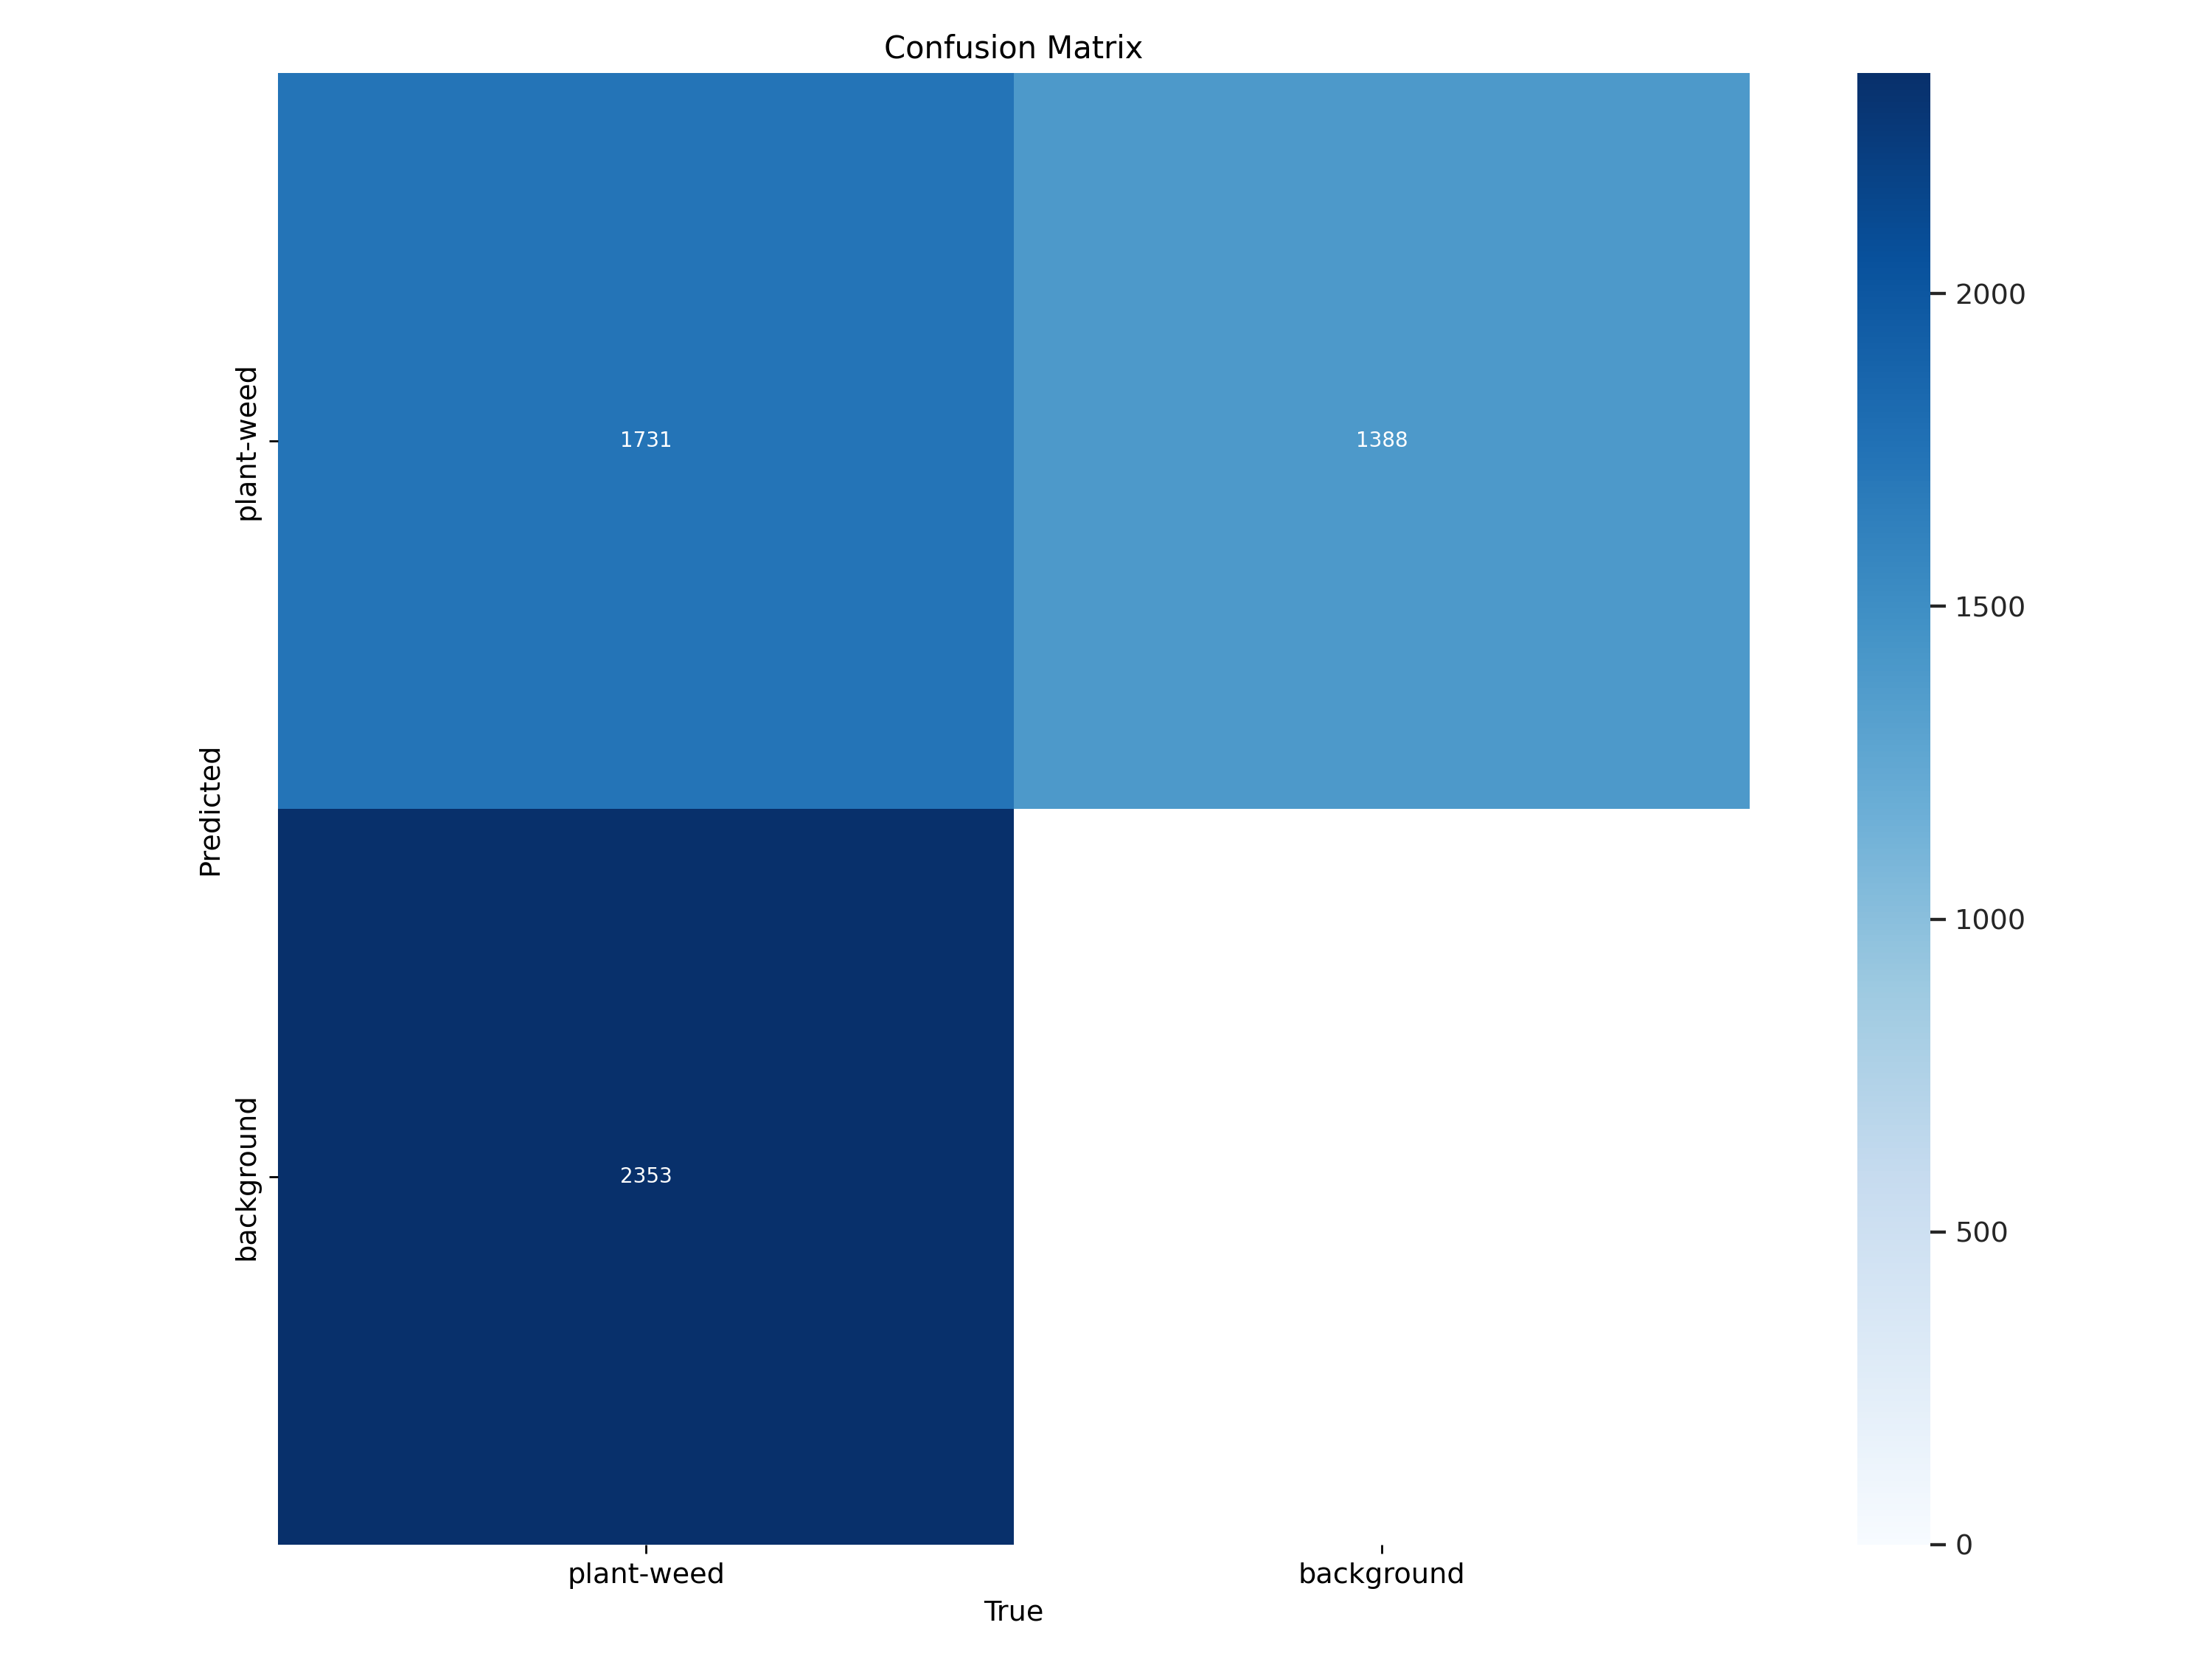

In [18]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

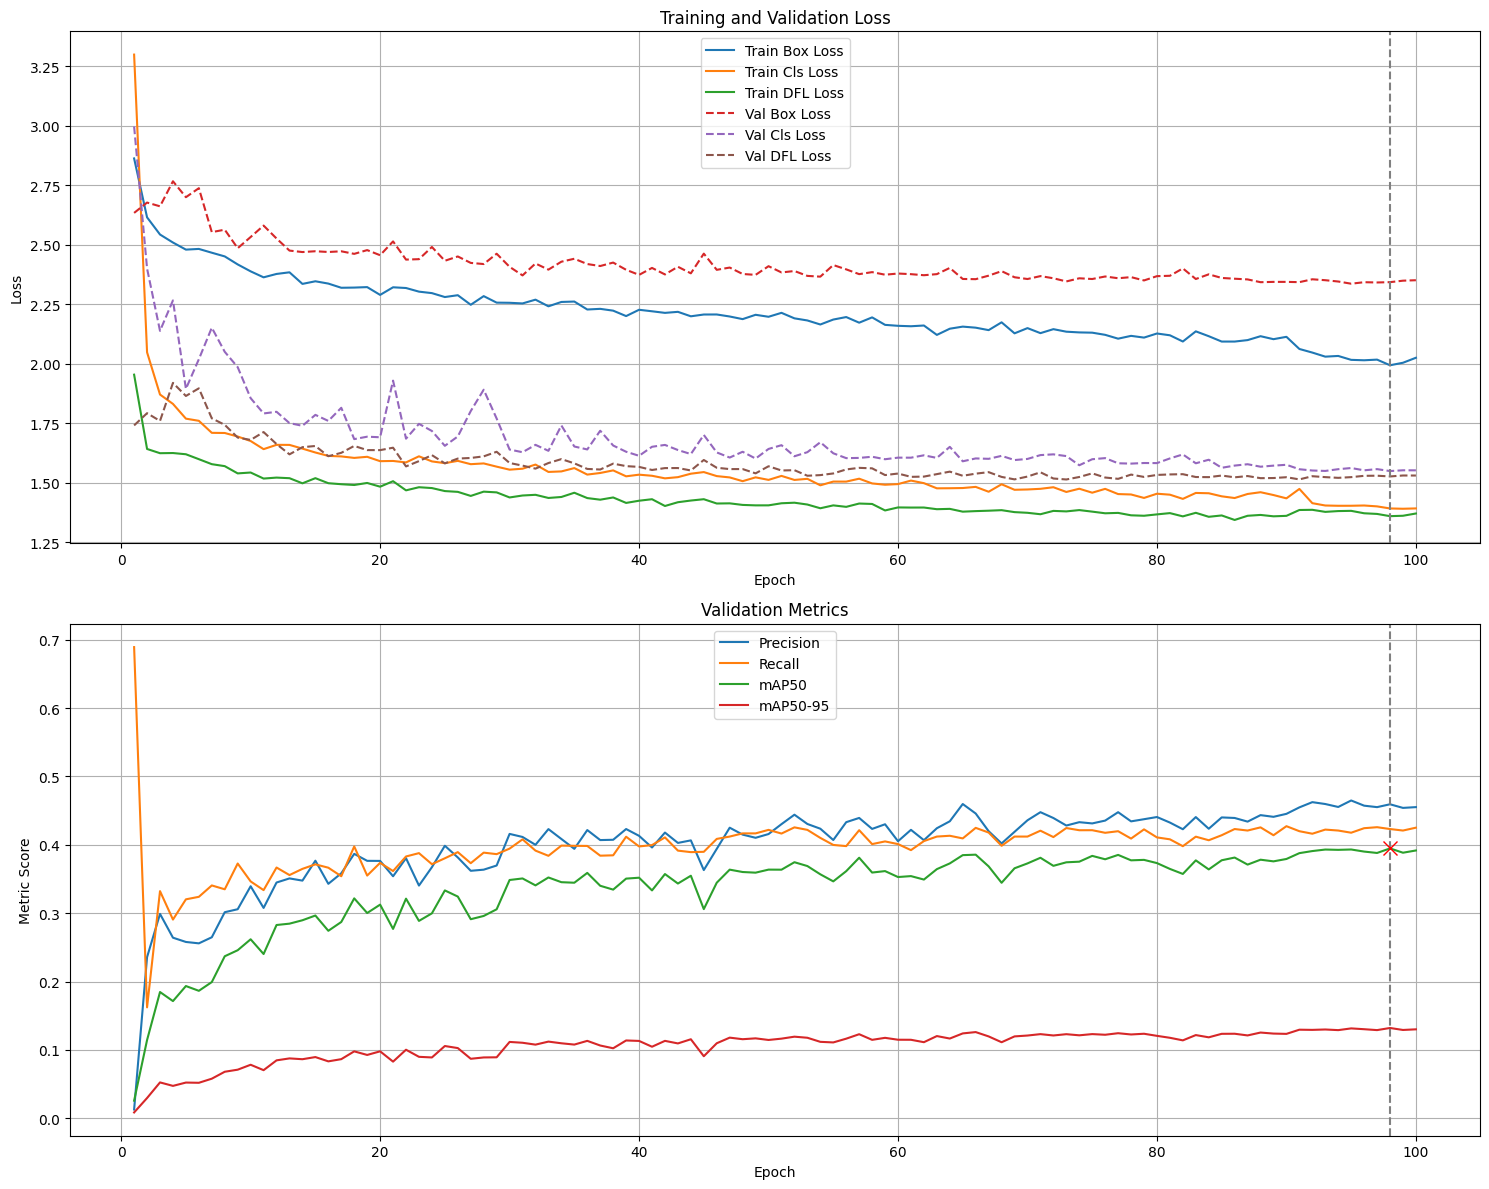

In [19]:
graph_training_metrics(df,epoch, graph="full")

**La pérdida (Loss)** mide el error a nivel de predicción individual (por ejemplo, diferencias en coordenadas de bounding boxes y clasificación).  

**El mAP (Mean Average Precision)** mide el rendimiento del modelo en términos de detección correcta (basado en IoU y umbrales de confianza).  

Las métricas mAP50 y mAP50-95 en este contexto suelen referirse al conjunto de validación (val set), ya que el cálculo del Mean Average Precision (mAP) generalmente se realiza sobre datos no vistos para evaluar el rendimiento real del modelo.

En los registros de entrenamiento, típicamente:

- Las pérdidas (train/box_loss, train/cls_loss, etc.) se calculan sobre el conjunto de entrenamiento.
- Las métricas (metrics/precision(B), metrics/recall(B), metrics/mAP50(B), etc.) se calculan sobre el conjunto de validación.
- Las pérdidas de validación (val/box_loss, val/cls_loss, etc.) también reflejan el rendimiento en el conjunto de validación.

In [20]:
graph_LrLoss_3D(df)

Validation set


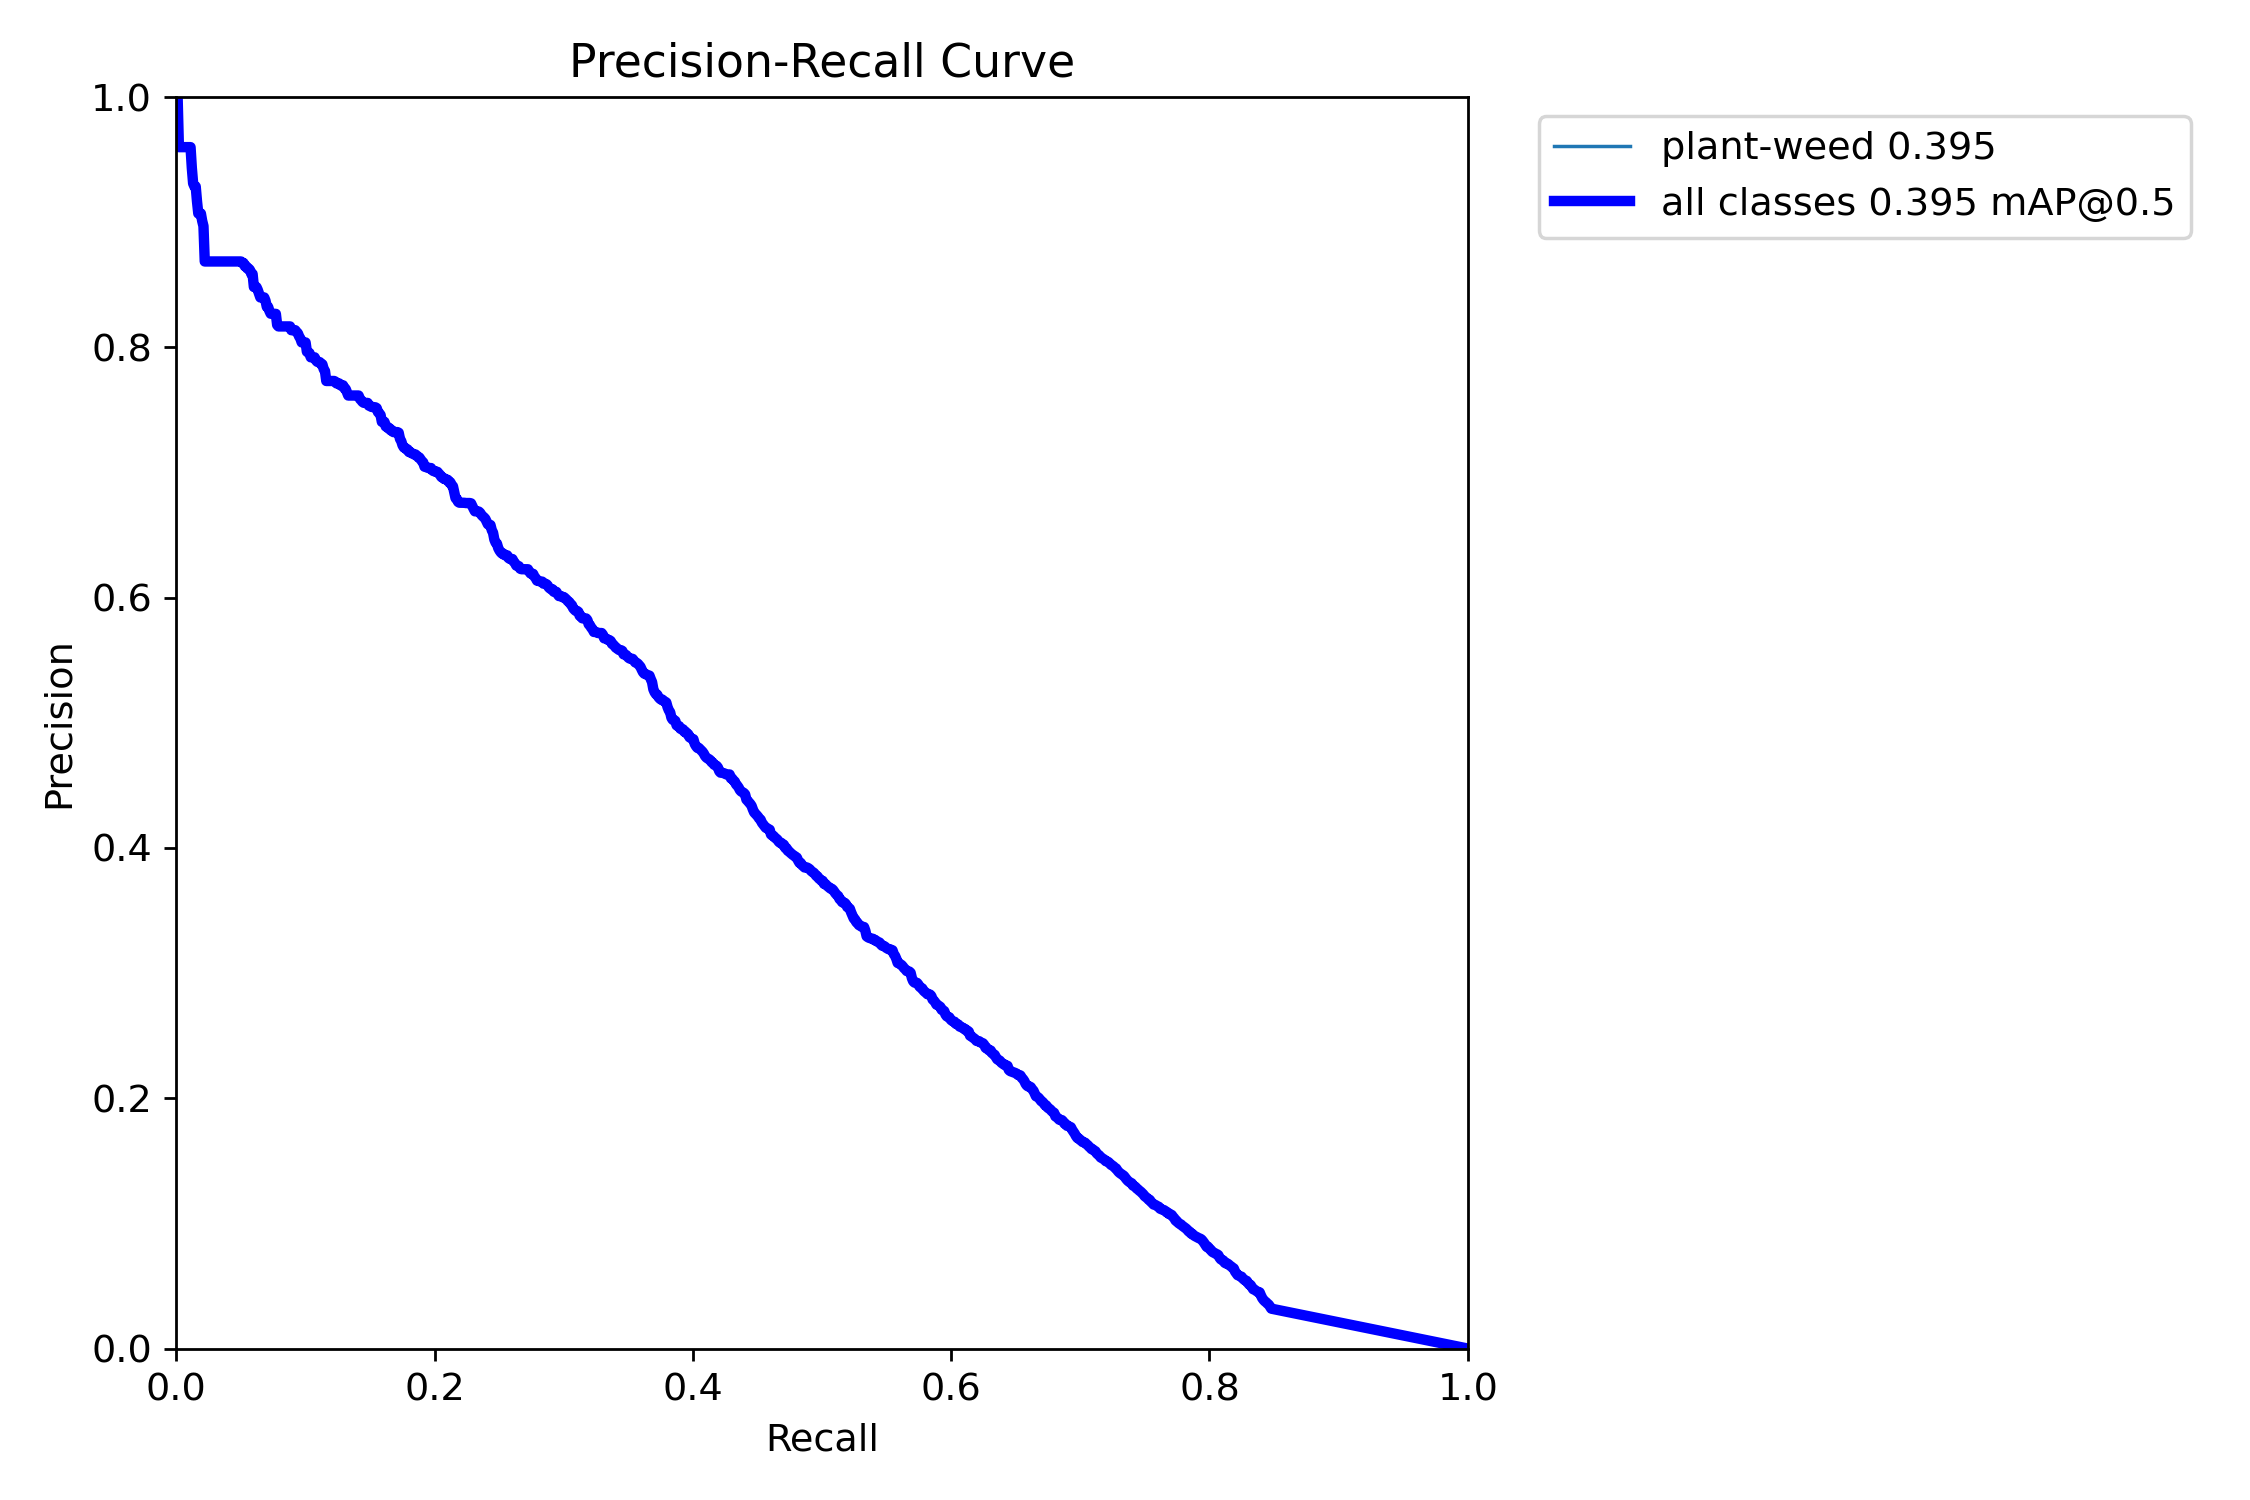

In [21]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

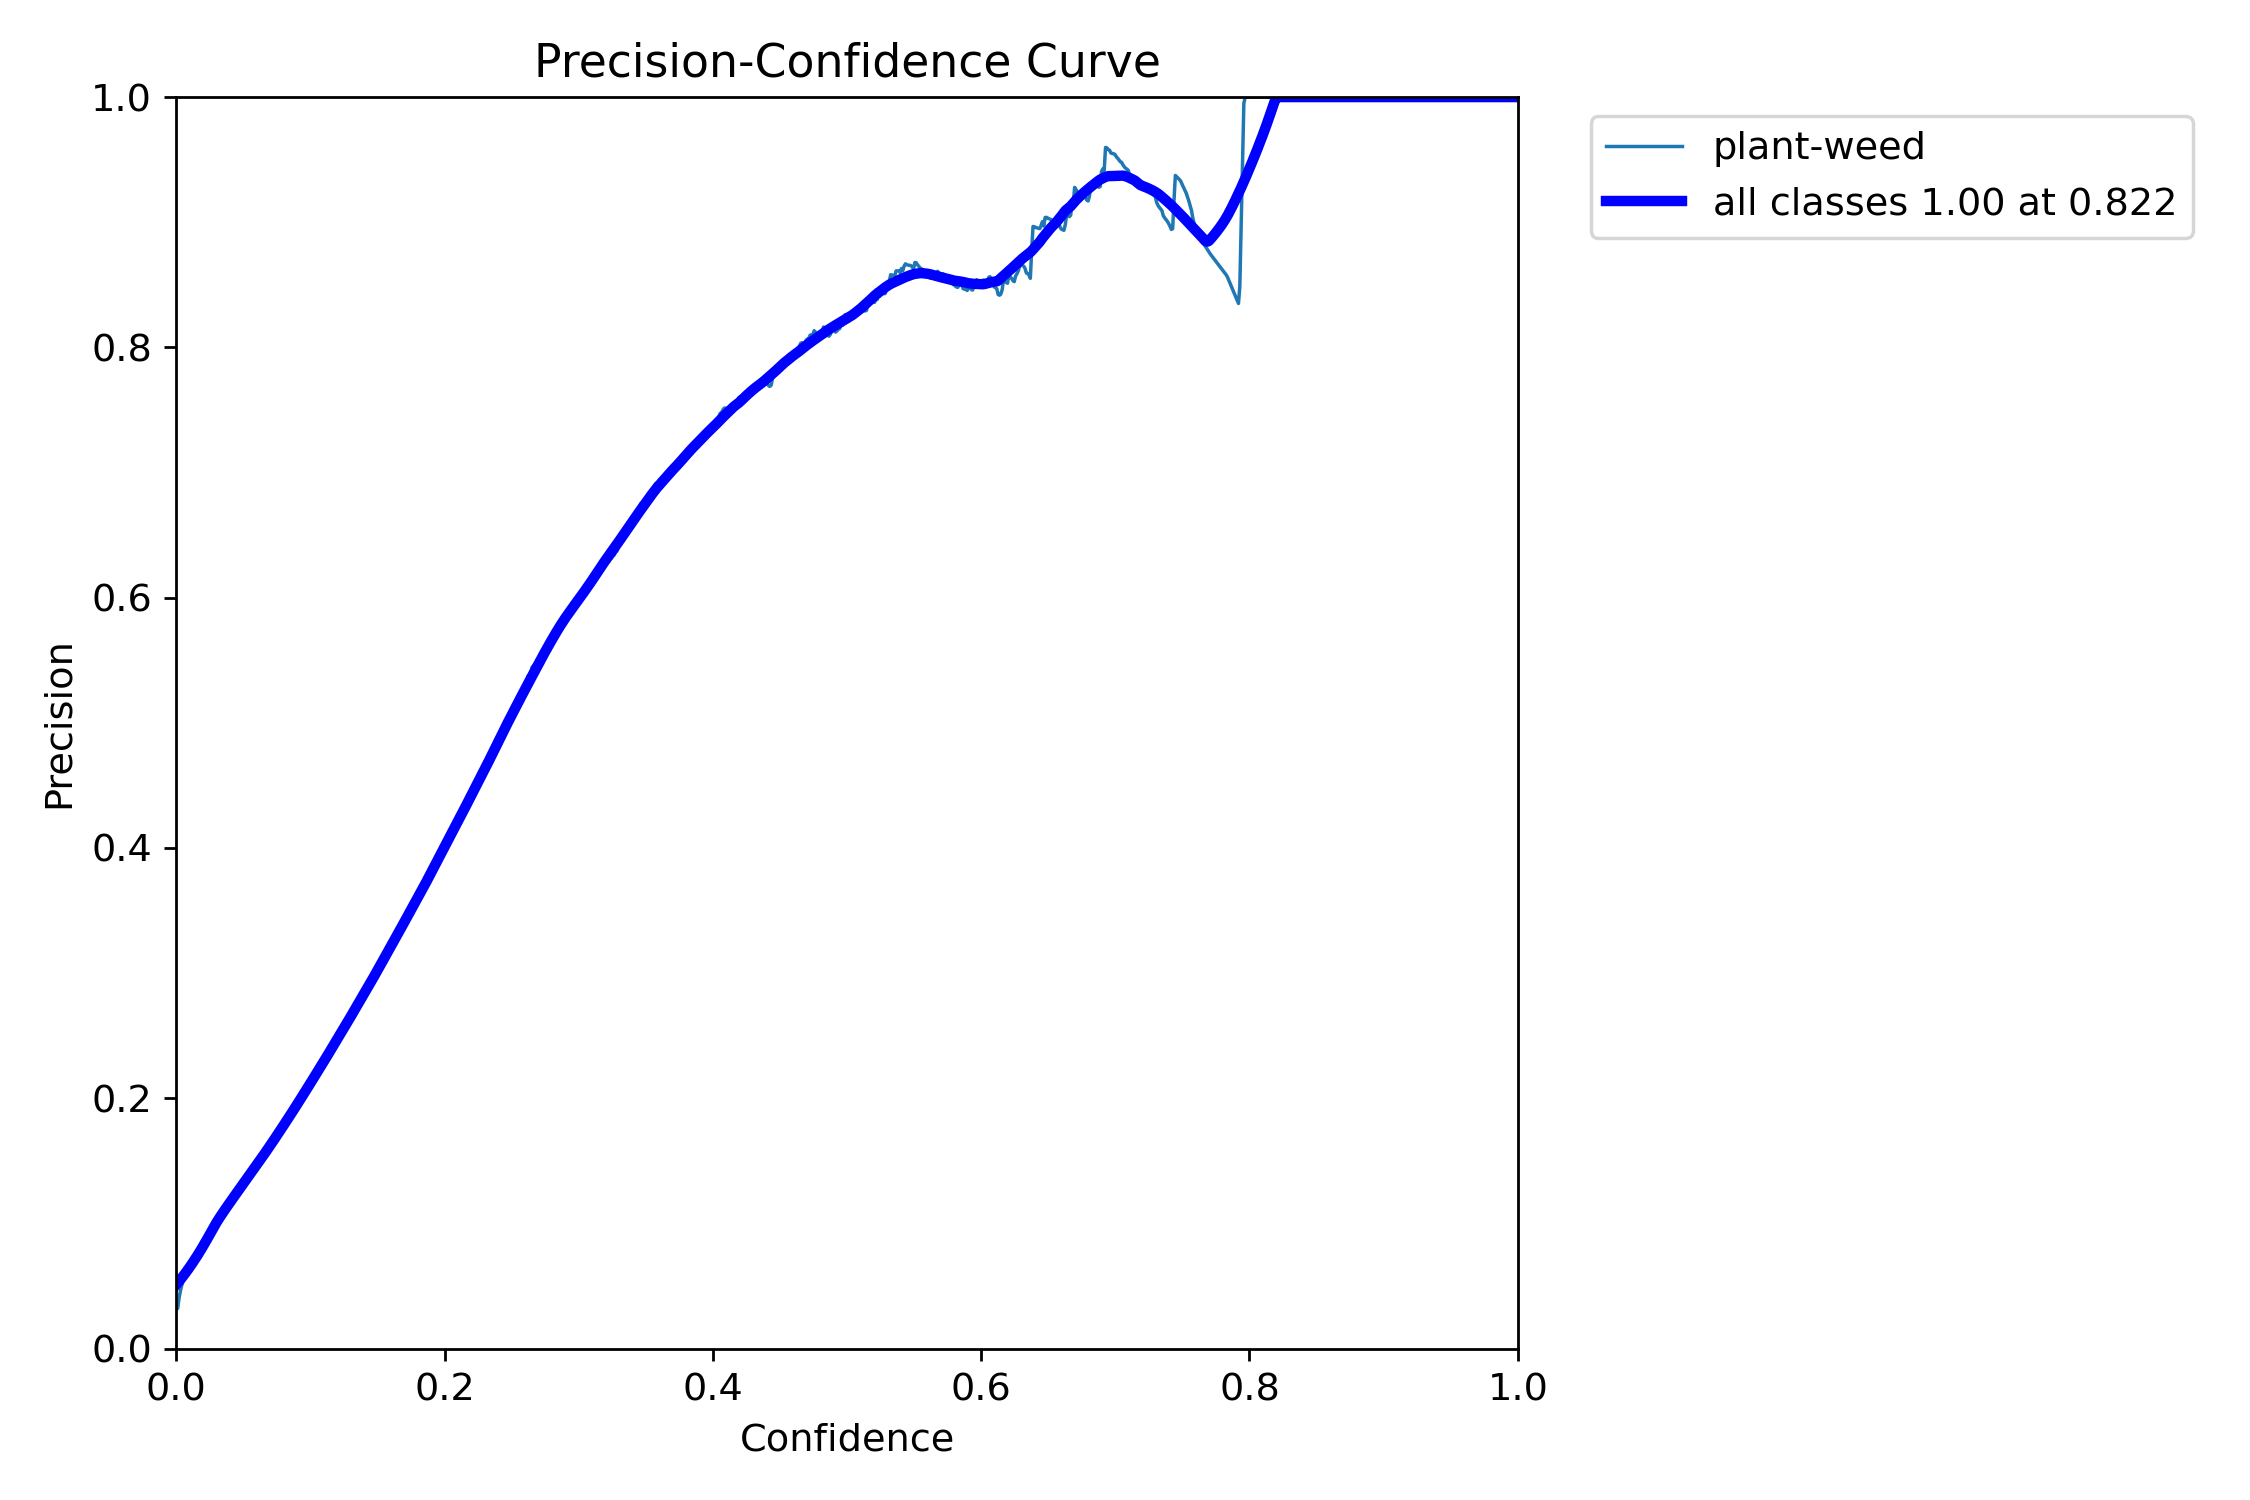

In [22]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

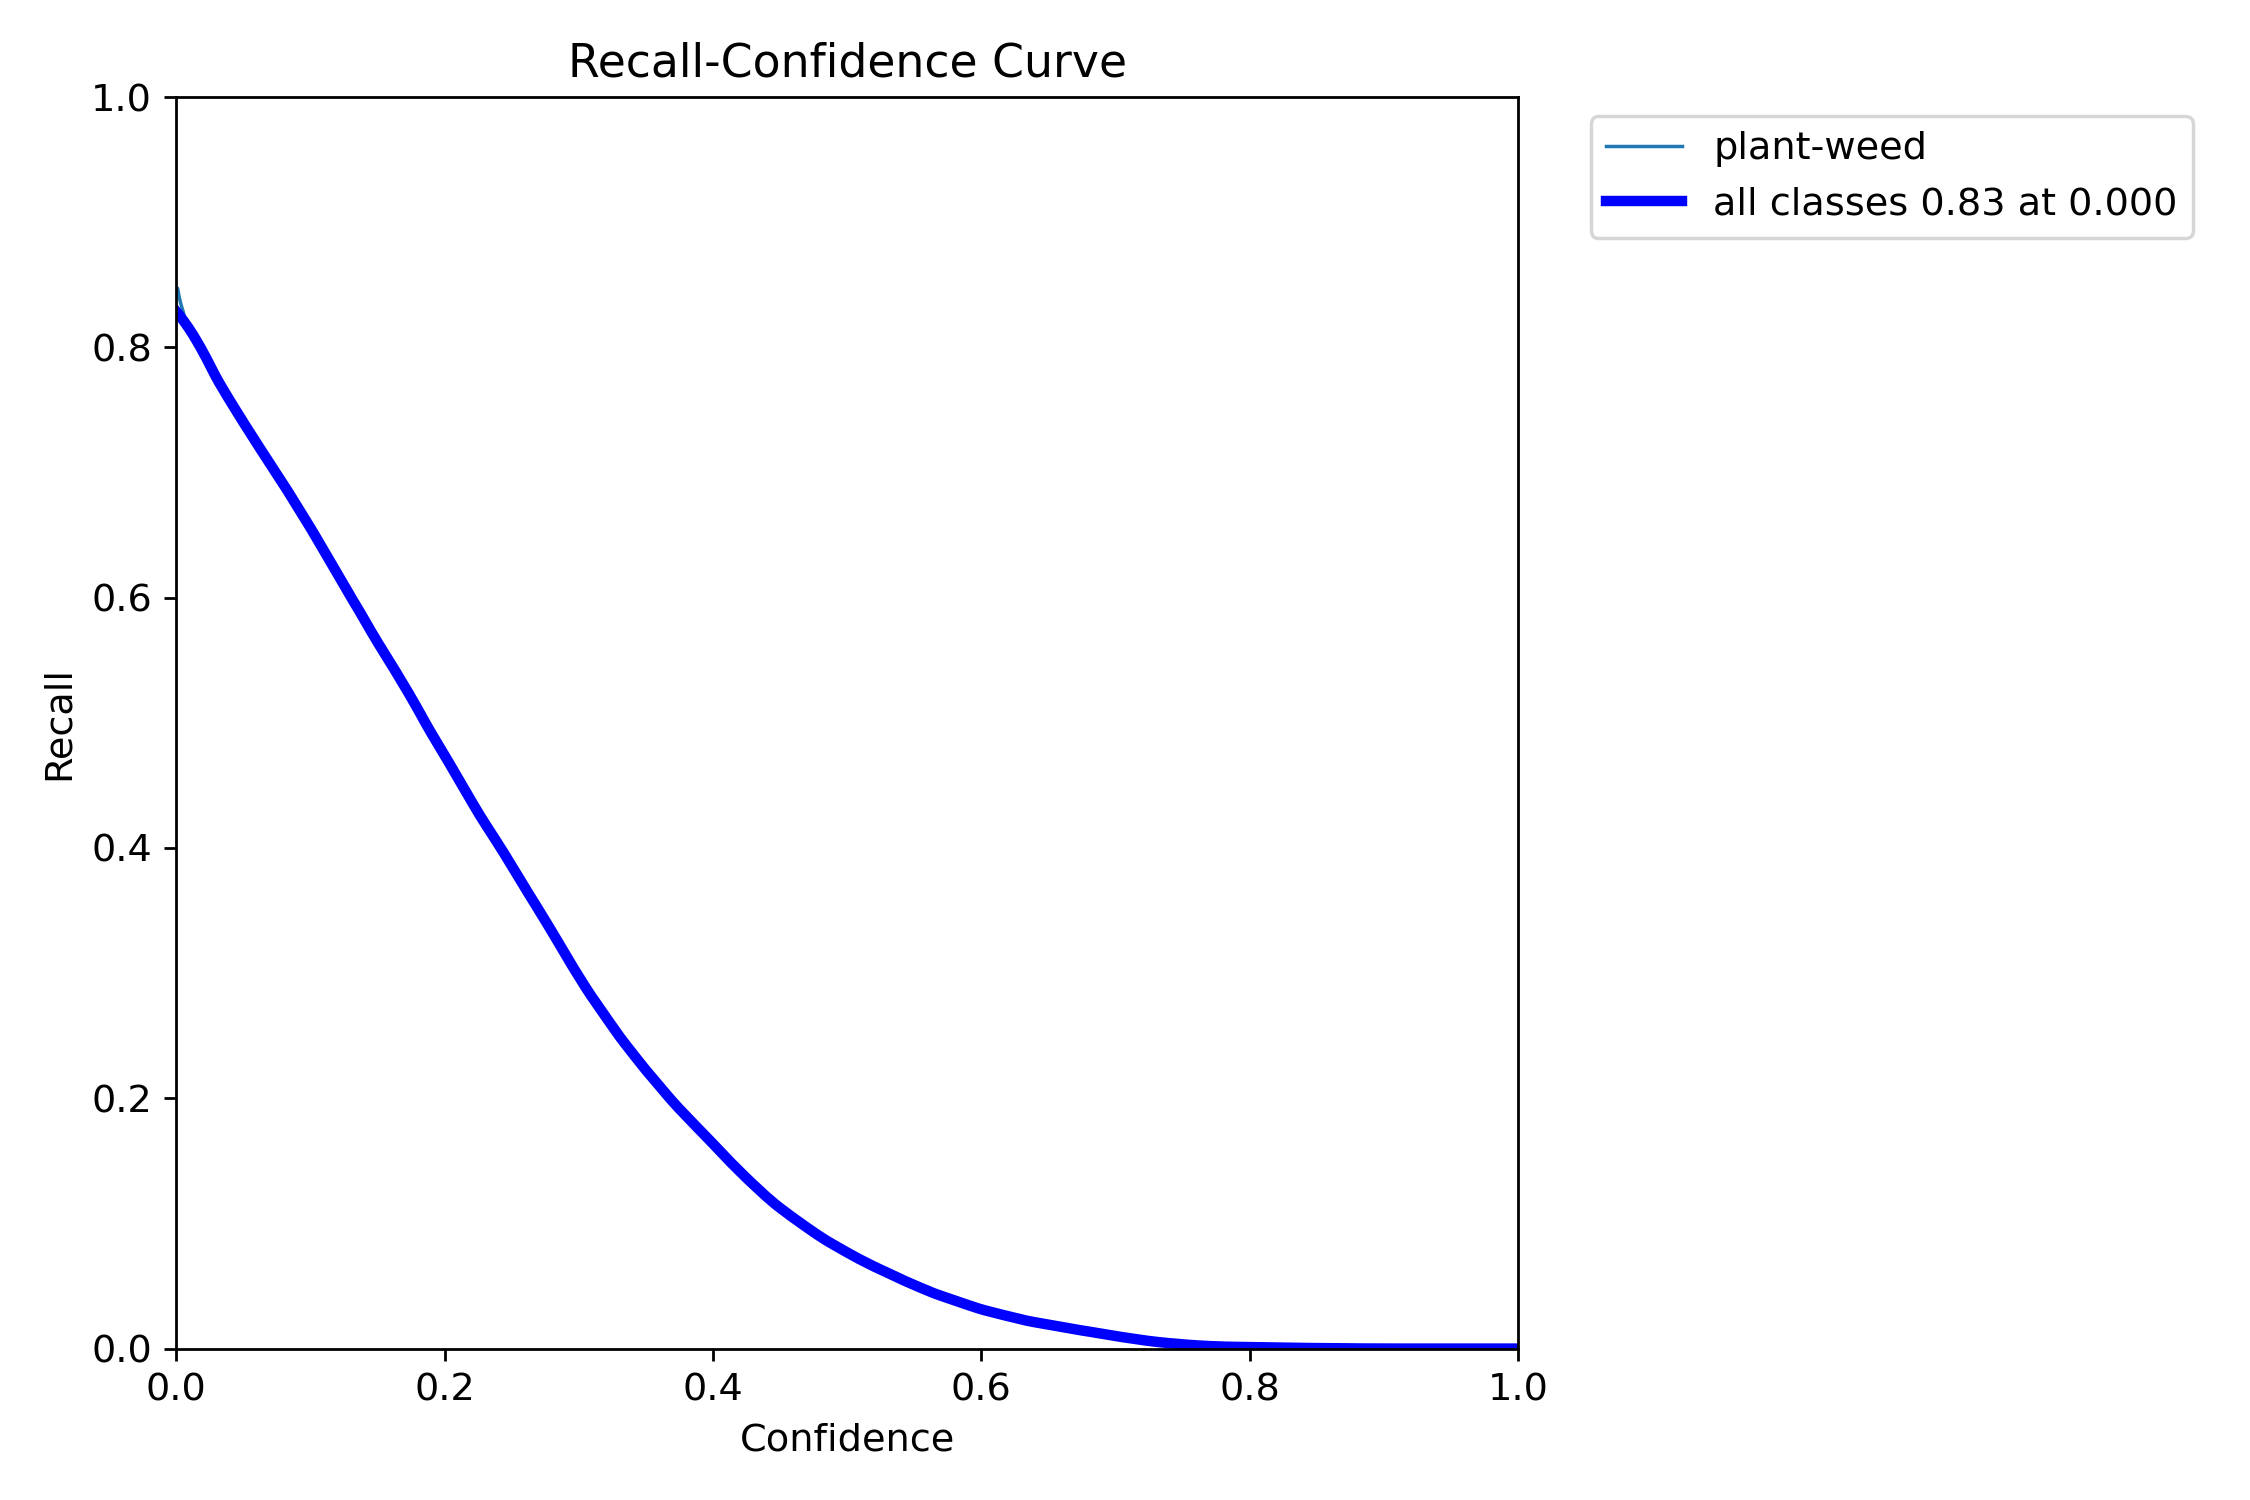

In [23]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

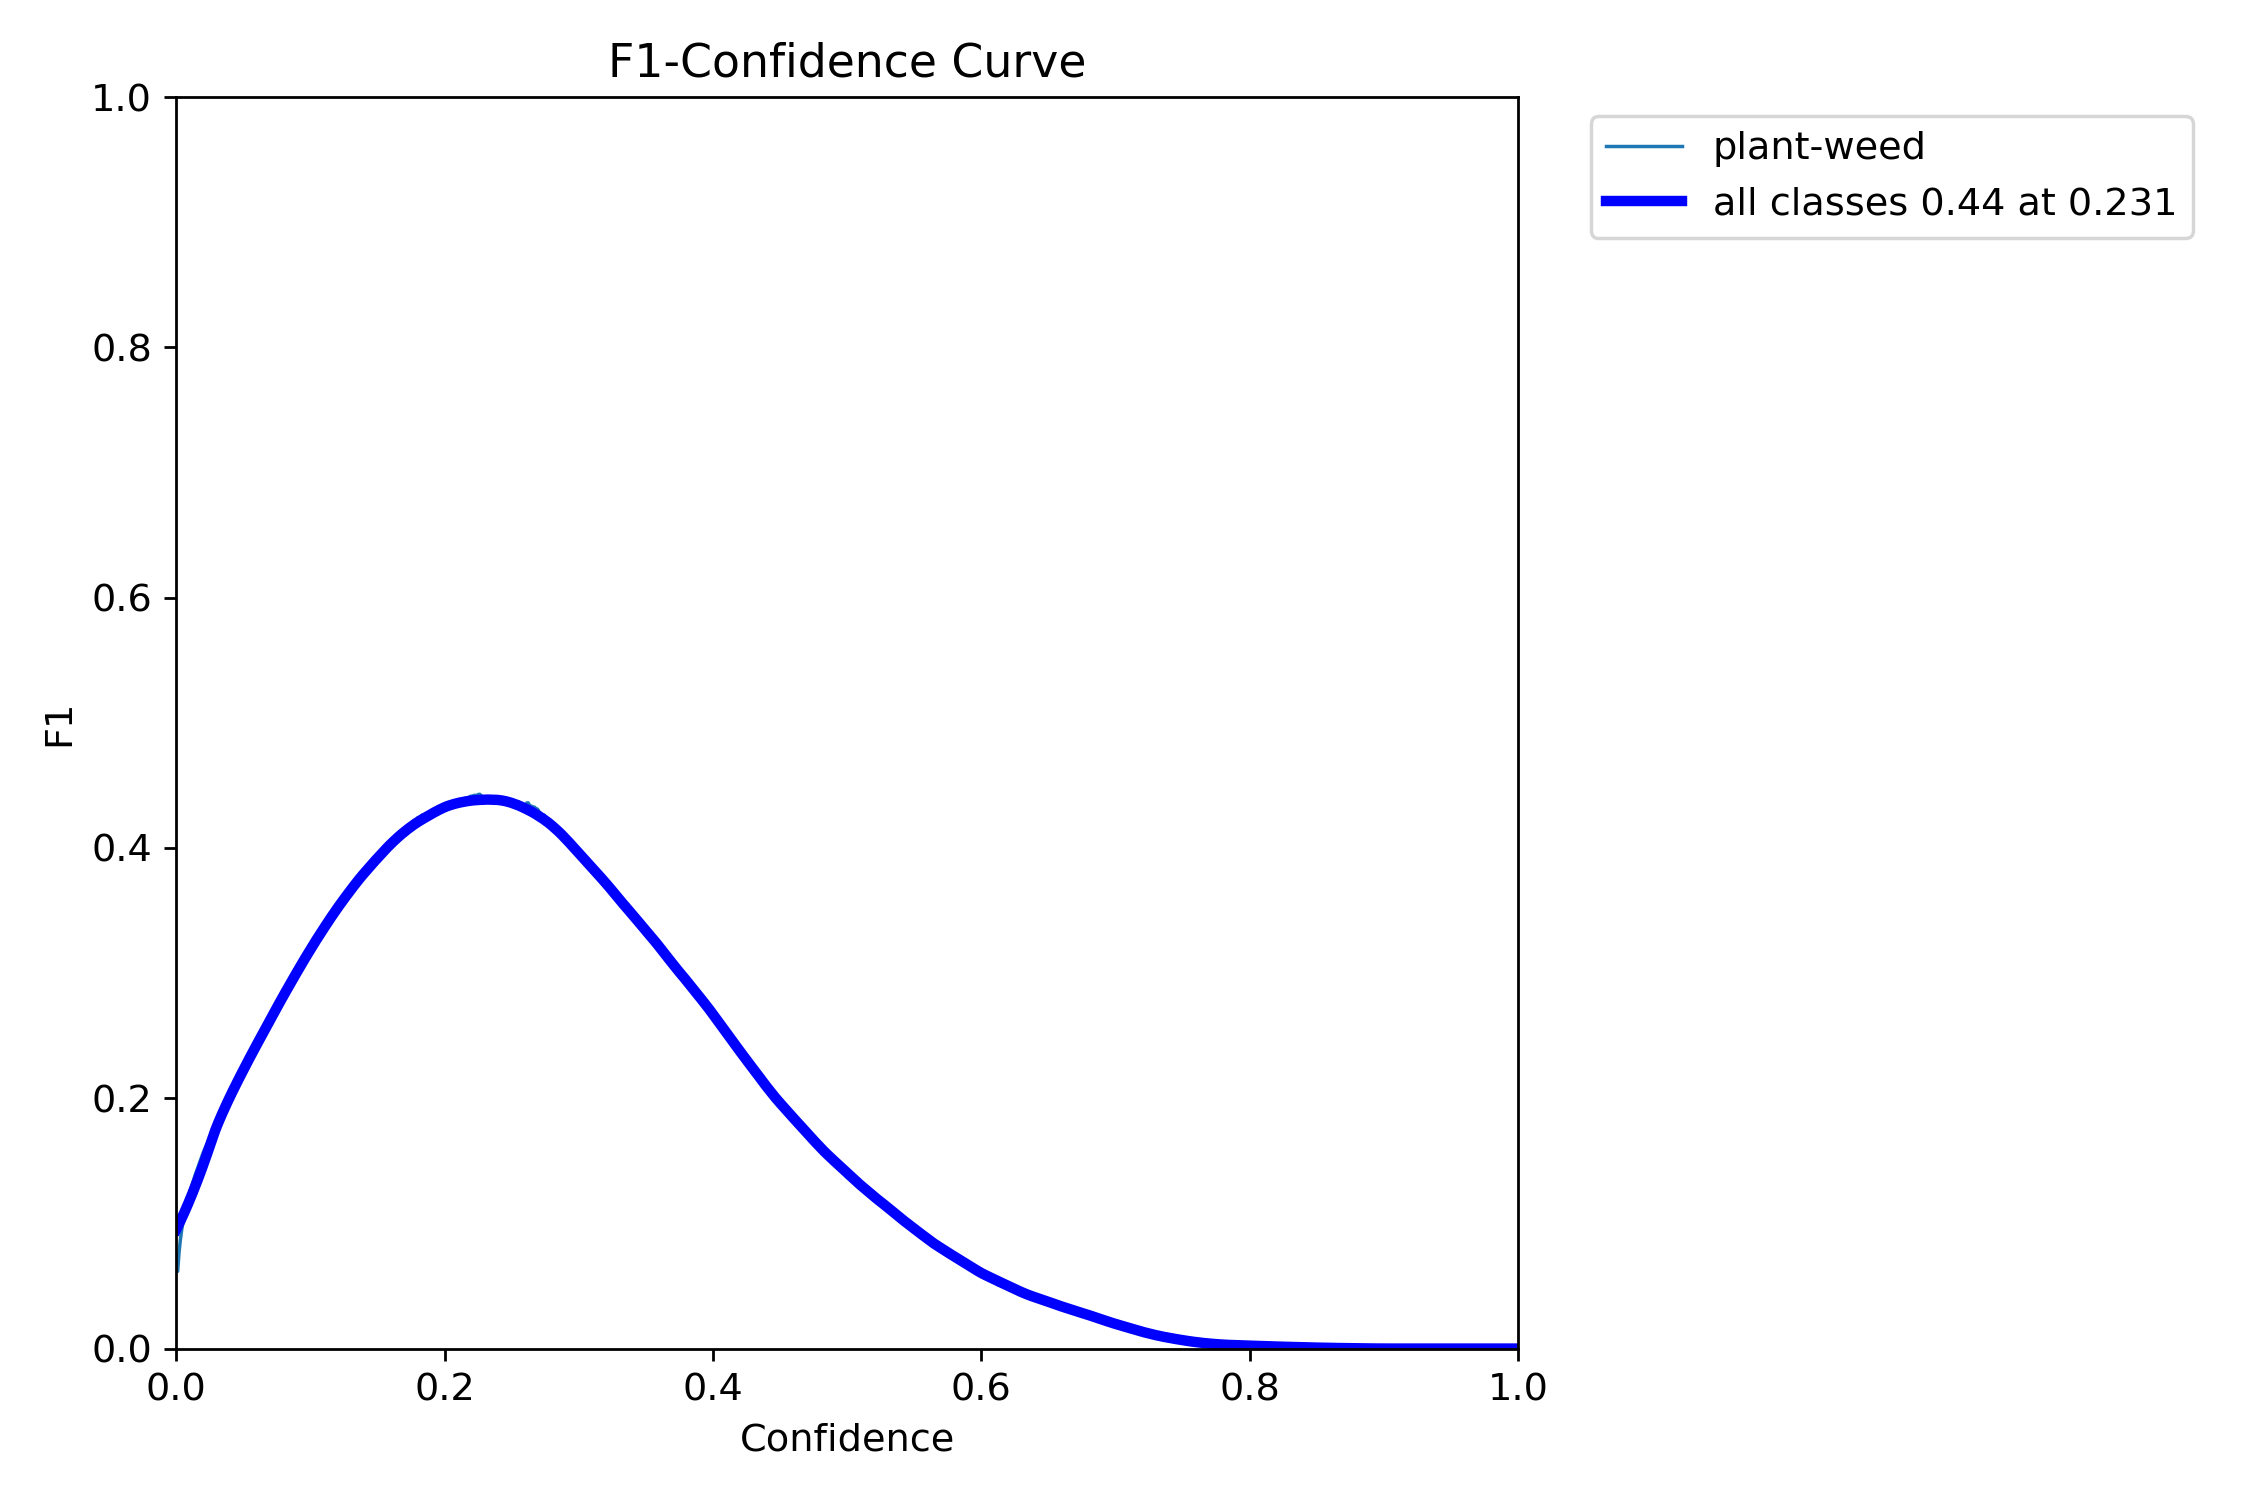

In [24]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

El valor de confianza que optimiza la precisión y recall es 0.231. En la mayoría de los casos, una mayor confianza es deseable.

### Conclusiones

**1. Pérdidas de entrenamiento y validación:**
- Se observa una tendencia decreciente en las pérdidas de entrenamiento (train/box_loss, train/cls_loss, train/dfl_loss), lo que indica que el modelo está aprendiendo.
- Las pérdidas de validación (val/box_loss, val/cls_loss, val/dfl_loss) también tienden a disminuir, aunque hay cierta variabilidad.
- Es posible que la pérdida no baje significativamente, pero el modelo se vuelva mejor en hacer predicciones útiles desde el punto de vista de la métrica de evaluación.  

**2. Métricas de validación:**
- La precisión y el recall muestran una mejora en las primeras épocas, pero luego pueden estabilizarse o fluctuar. 
- **El modelo mejora en precisión sin mejorar mucho en pérdida:** A veces, el modelo aprende a hacer predicciones más consistentes sin que la pérdida baje notablemente. Si el modelo ya encontró una solución razonablemente buena y mejora en aspectos como la **confianza en las predicciones** o el **ajuste de umbrales de decisión**.
- La métrica mAP50 y mAP50-95 aumentan con el tiempo, lo que sugiere una mejora en la capacidad del modelo para hacer predicciones correctas

**3️. El loss puede estar en una meseta (*plateau*)**  

- Es común que la pérdida se estanque en ciertos momentos del entrenamiento, incluso cuando el rendimiento del modelo sigue mejorando.  
- Esto puede indicar que el modelo está cerca de un óptimo y que ajustar hiperparámetros como la tasa de aprendizaje podría ayudar a seguir mejorando.  

**4️. Regularización y *trade-offs* en la función de pérdida**  

- Algunas funciones de pérdida están diseñadas para penalizar ciertas características del modelo, como la confianza excesiva en ciertas clases.  
- Si el modelo mejora en términos de **precisión y recall** sin cambiar mucho en la función de pérdida, podría significar que está **mejorando la distribución de sus predicciones sin reducir su error absoluto**.  

#### Posibles Mejoras
- Analizar la distribución de **confianza en las predicciones** para ver si el modelo está ajustando mejor sus probabilidades.  
- Revisar si el **IoU promedio** de los bounding boxes mejora, incluso si la pérdida no cambia mucho.  
- Probar con una **tasa de aprendizaje más baja** para ver si la pérdida vuelve a disminuir.  

----

# Estrategy 2

In [25]:
change_path(target_folder2)

Current working directory: /docs/Experimentos/2 Finetuning/5 set/runs/detect


## Experiment 13 *(full dataset)*
### *3m | 60º+90º | small + mid*

In [26]:
folder = "train/"

In [27]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df2 = pd.read_csv(file_path)
df = df2.copy()
df2.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,673.462,1.83843,1.33453,1.37074,0.41209,0.33924,0.29084,0.09404,2.61510,1.77982,1.67887,0.000119,0.000119,0.000119
96,97,679.638,1.81782,1.32551,1.34566,0.42720,0.33940,0.29832,0.09662,2.59056,1.77491,1.66405,0.000099,0.000099,0.000099
97,98,686.796,1.79991,1.32942,1.35591,0.41389,0.33411,0.28886,0.09318,2.62092,1.78625,1.68176,0.000079,0.000079,0.000079
98,99,693.123,1.81299,1.31321,1.34892,0.42446,0.33613,0.29413,0.09500,2.60383,1.77663,1.66463,0.000060,0.000060,0.000060
99,100,699.733,1.80786,1.29337,1.33602,0.42700,0.33985,0.29699,0.09578,2.59915,1.77664,1.66437,0.000040,0.000040,0.000040


In [28]:
last_row = df.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 11.662 min


#### Best epoch

In [29]:
best = df[df['metrics/mAP50(B)'] == df['metrics/mAP50(B)'].max()].sort_values(by='epoch', ascending=True).head(1)
best['train_time'] = time
best

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,train_time
85,86,603.118,1.97979,1.40062,1.37308,0.41873,0.35573,0.31889,0.10399,2.54386,1.74818,1.61663,0.000317,0.000317,0.000317,11.662217


In [30]:
epoch = best['epoch'].values.astype(int)[0]
mAP50 = best['metrics/mAP50(B)'].values.astype(float)[0]
print(f"Mejor época de entrenamiento {epoch} con mAP50 de {mAP50:.3f}")

Mejor época de entrenamiento 86 con mAP50 de 0.319


In [31]:
if not best_models.empty:
    best_models = pd.concat([best_models, best], ignore_index=True)
else:
    best_models = best.copy().reset_index().drop(columns='index')

#### Classification metrics

In [32]:
TP = 2348
FP = 2128
FN = 4081
base = TP+FP+FN
print("Total de objetos detectados:", base)

Total de objetos detectados: 8557


In [33]:
# Cálculo de porcentajes
TP/base, FP/base, FN/base

(0.2743952319738226, 0.24868528689961436, 0.47691948112656307)

### Graphs

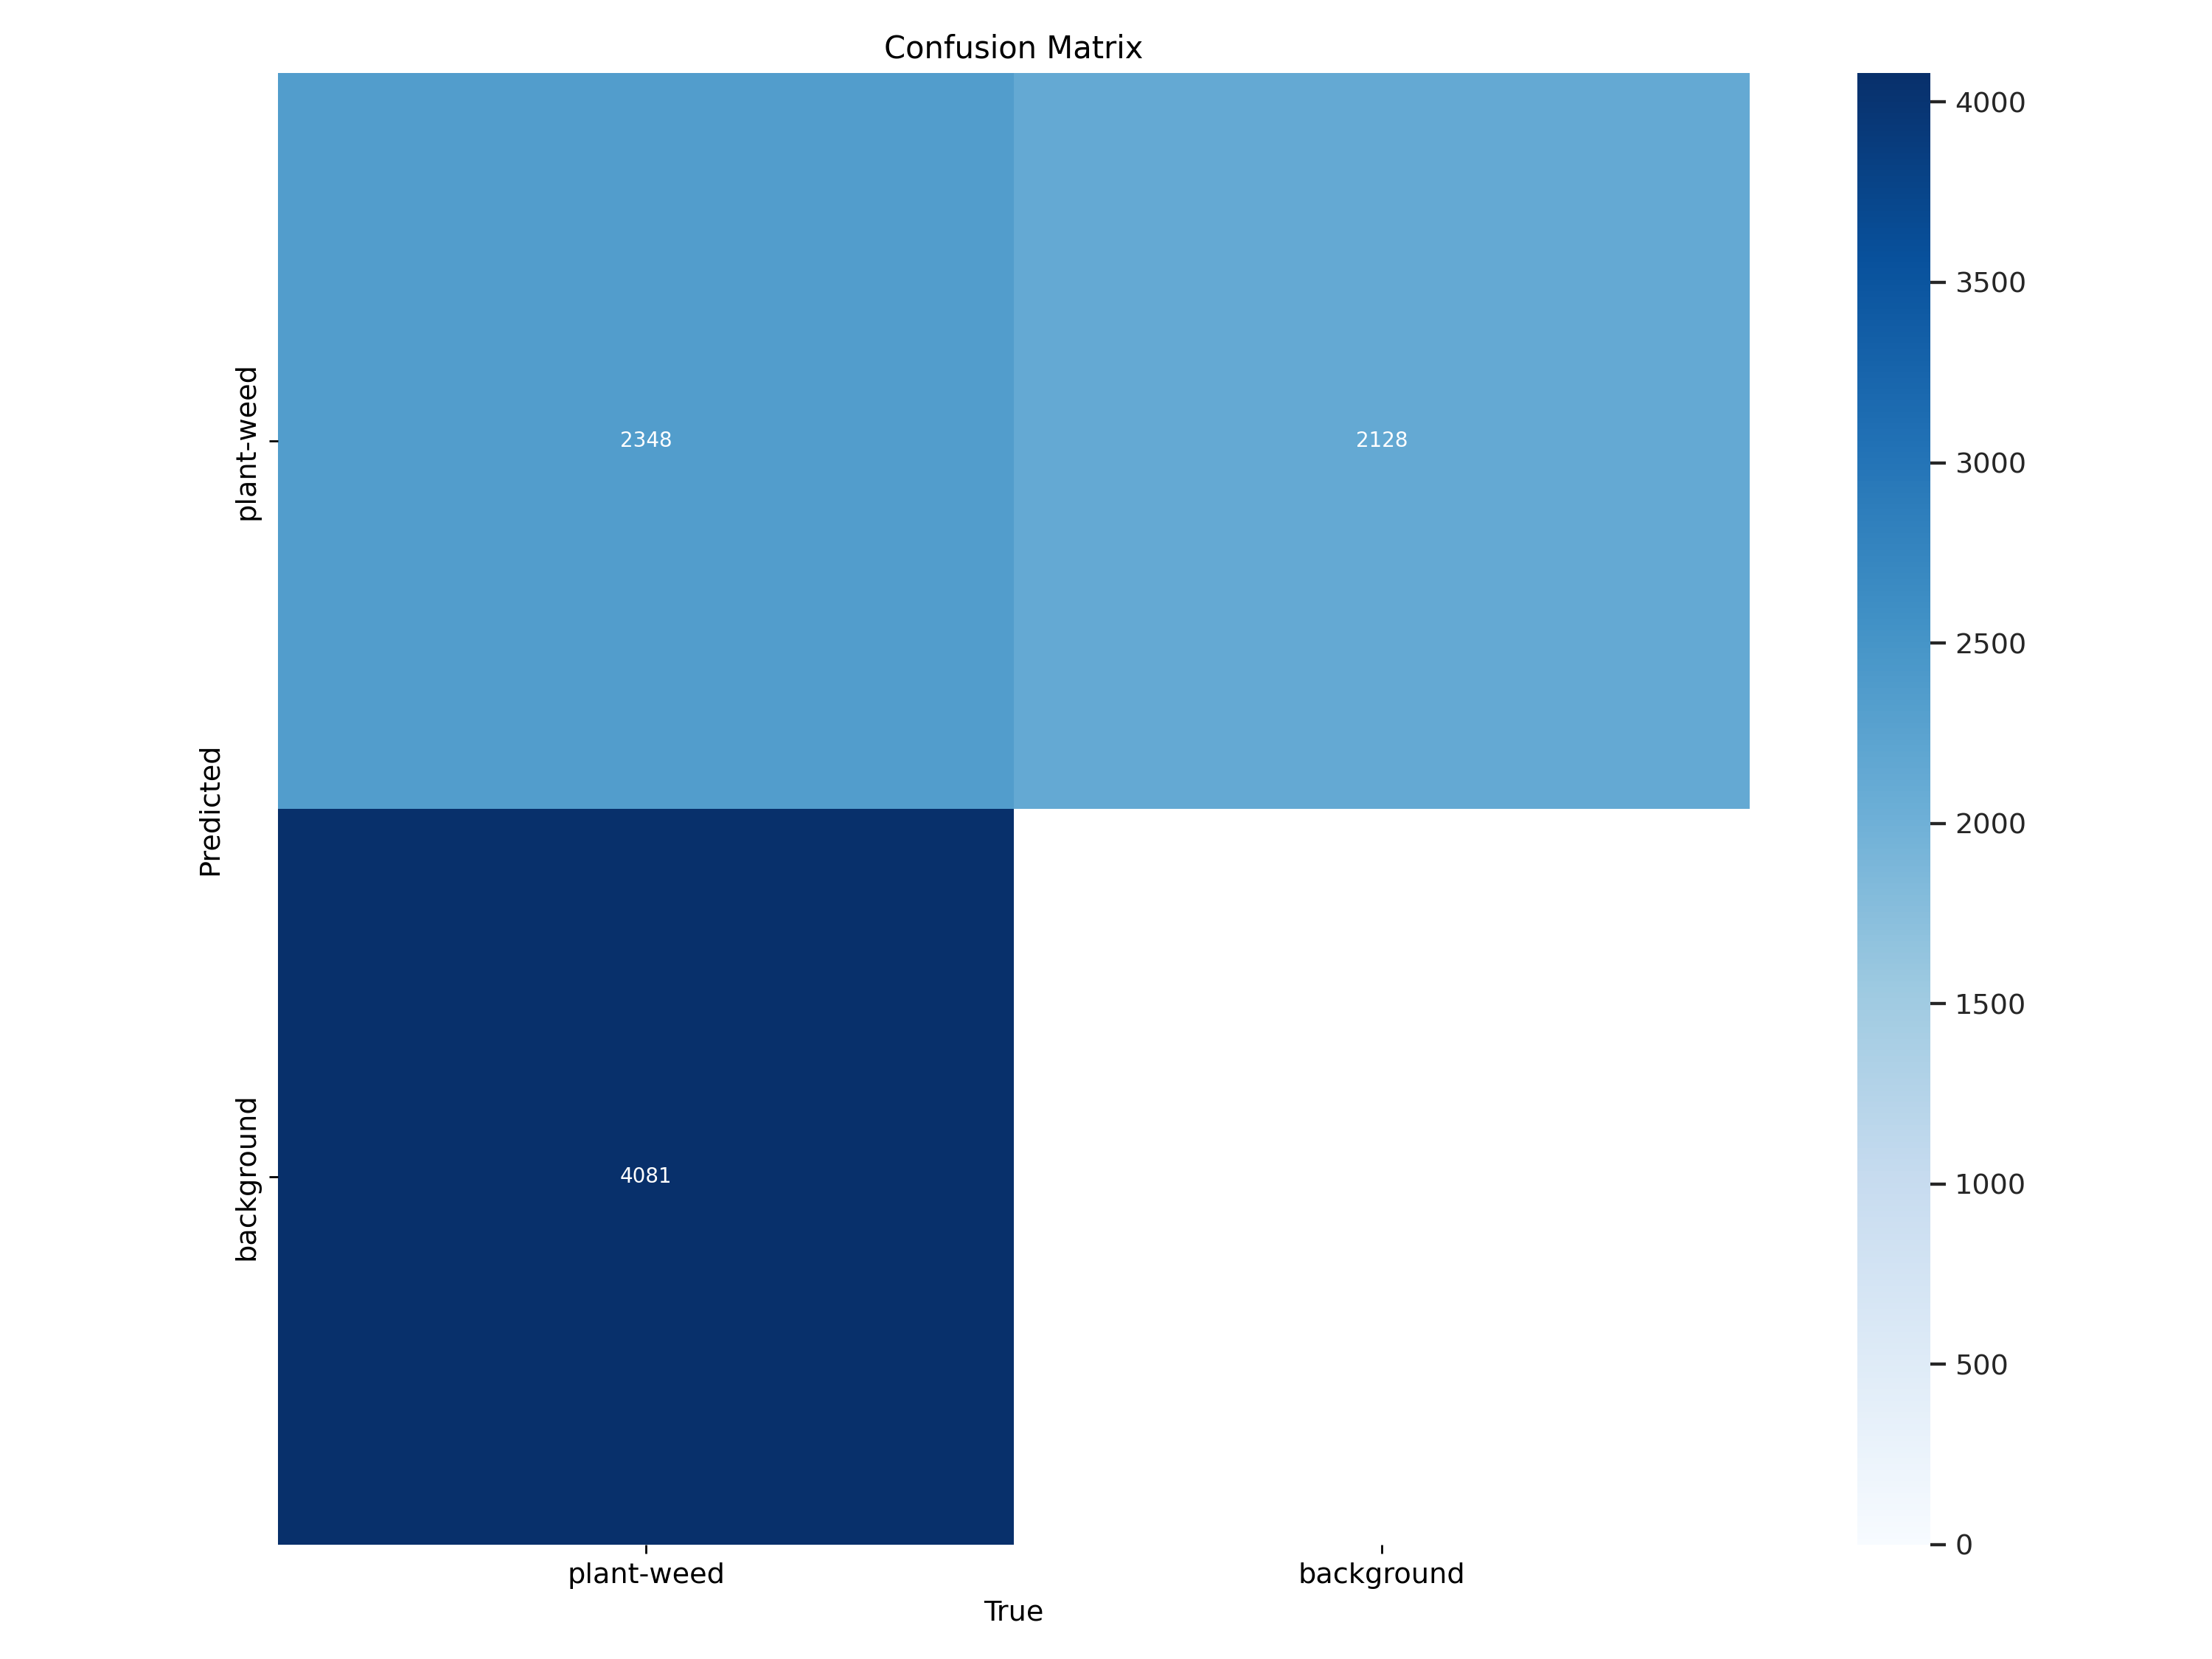

In [34]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

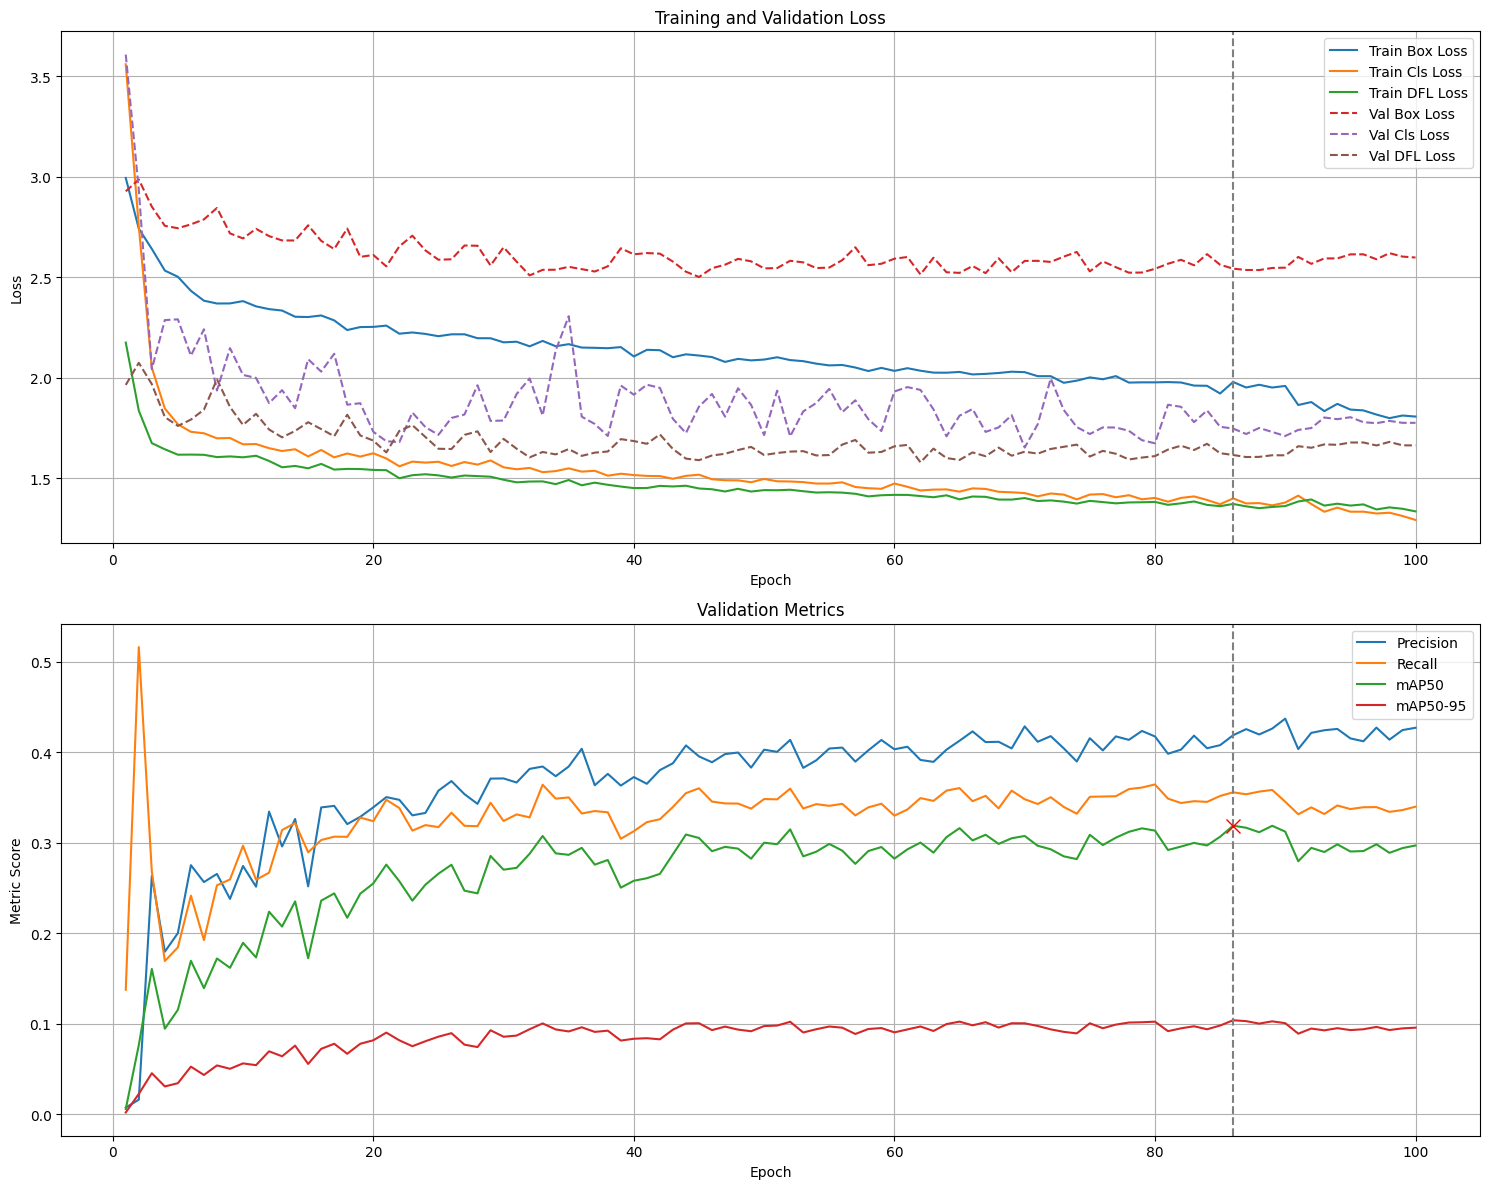

In [35]:
graph_training_metrics(df, epoch, graph="full")

In [36]:
graph_LrLoss_3D(df)

Validation set


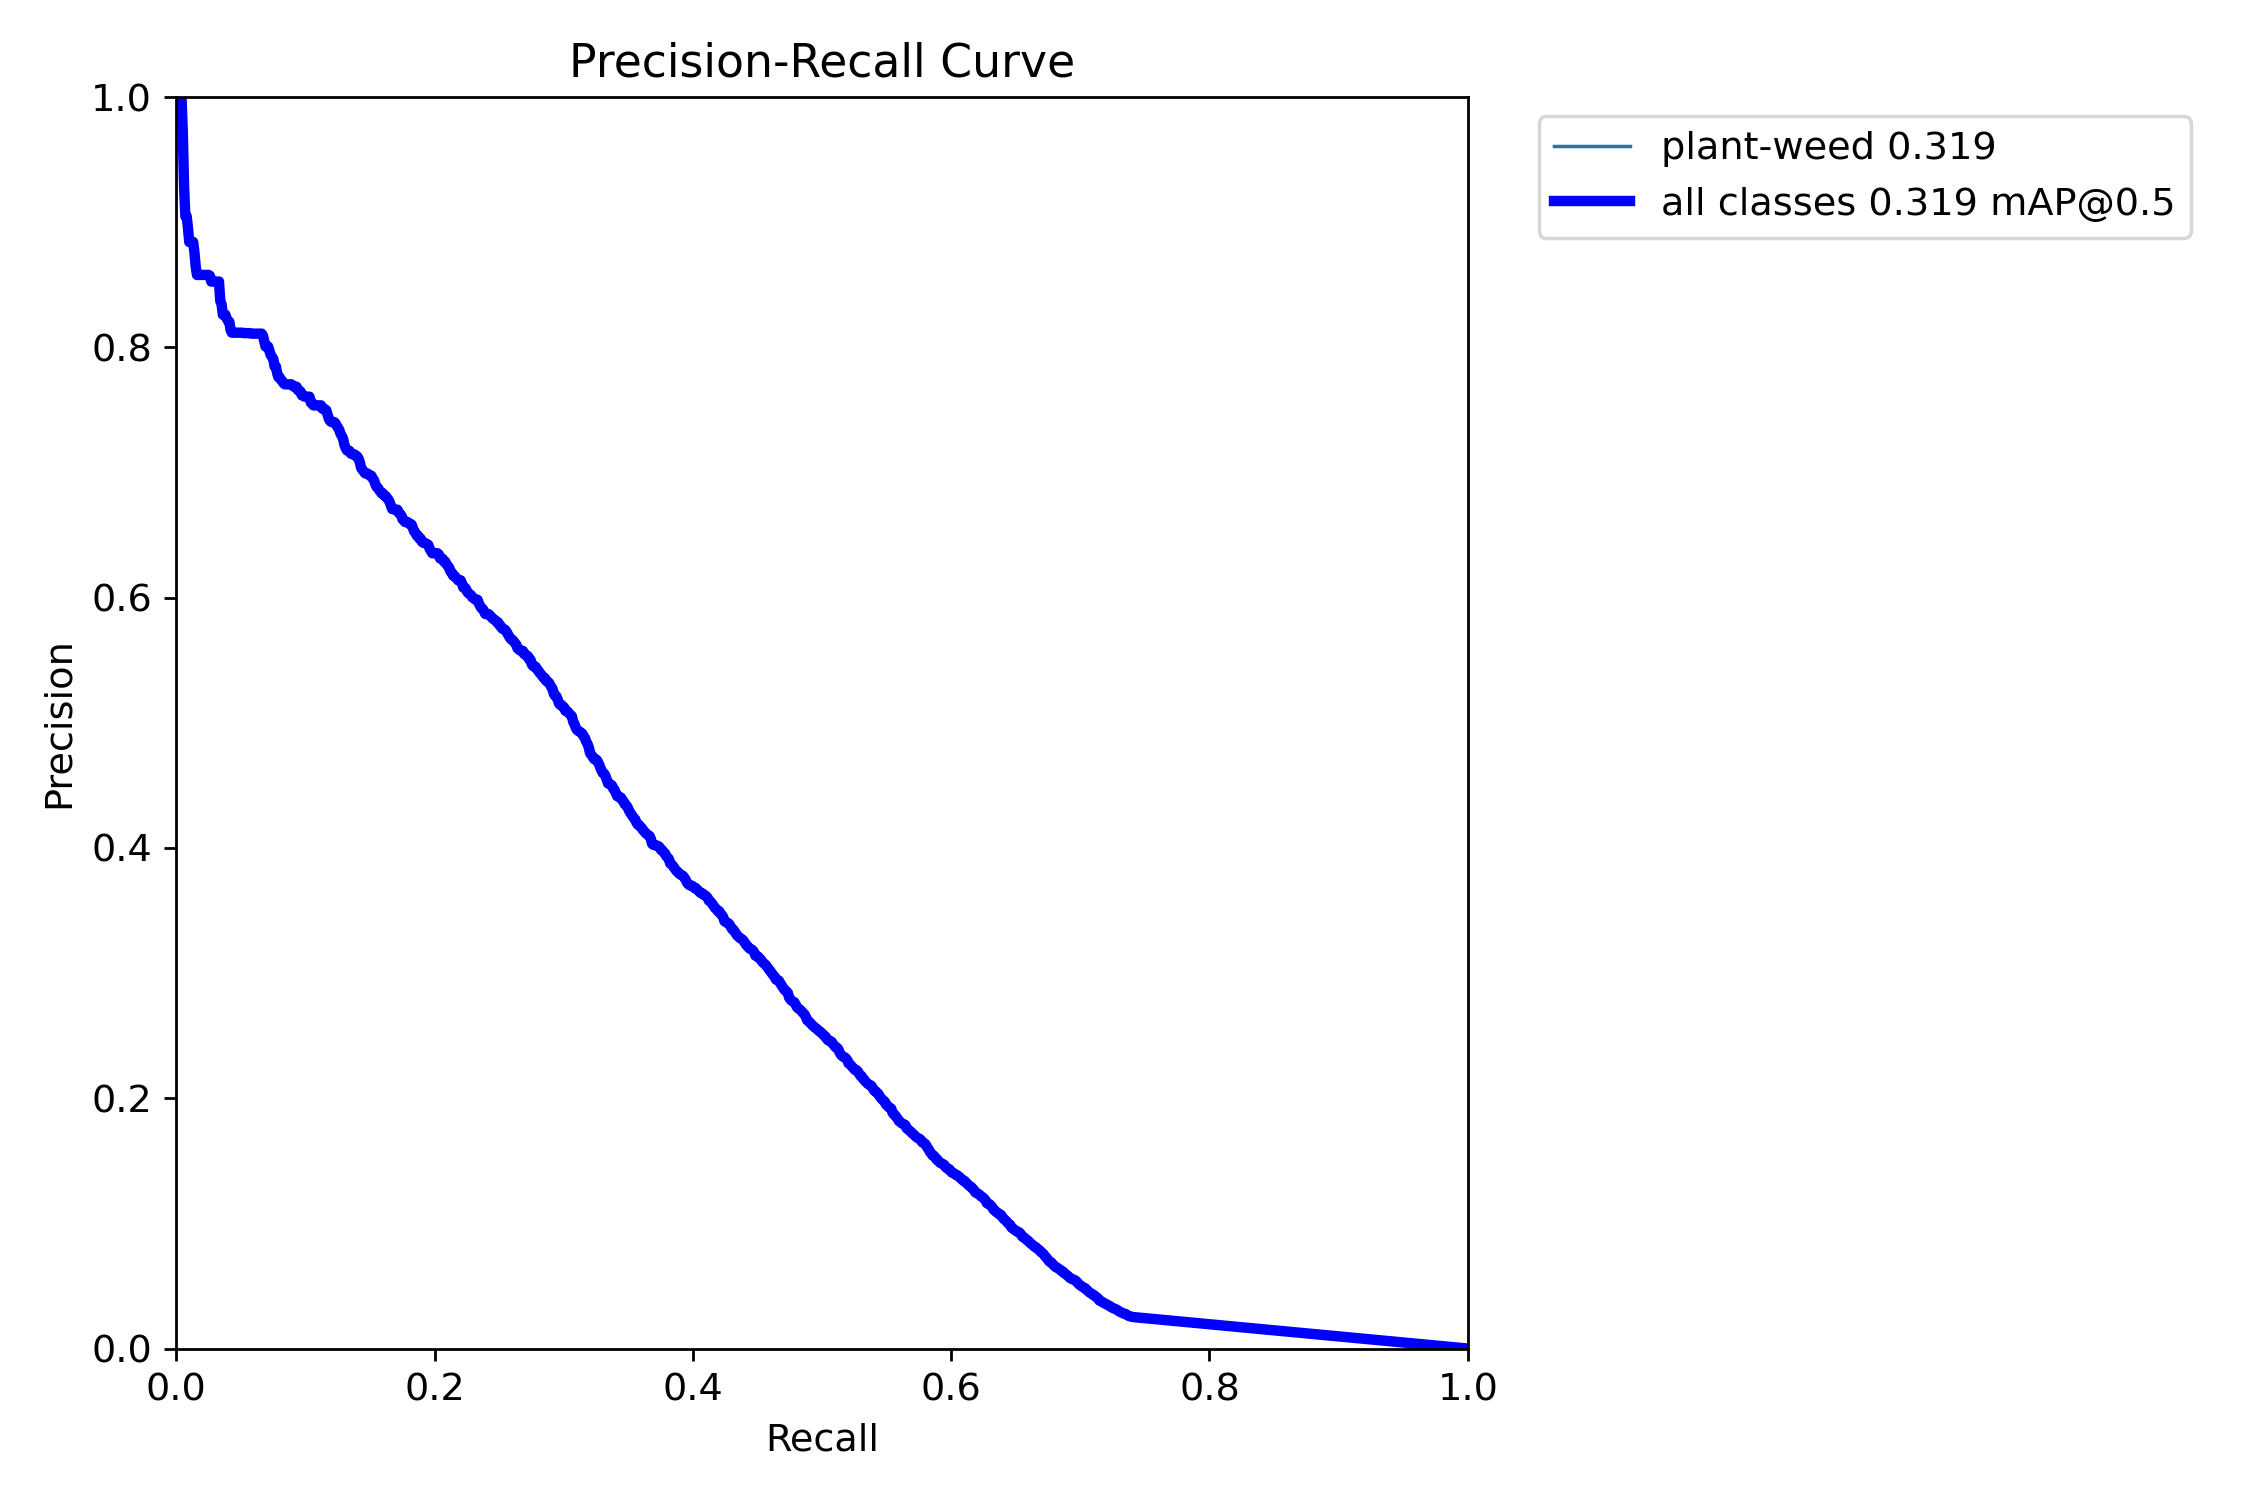

In [37]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

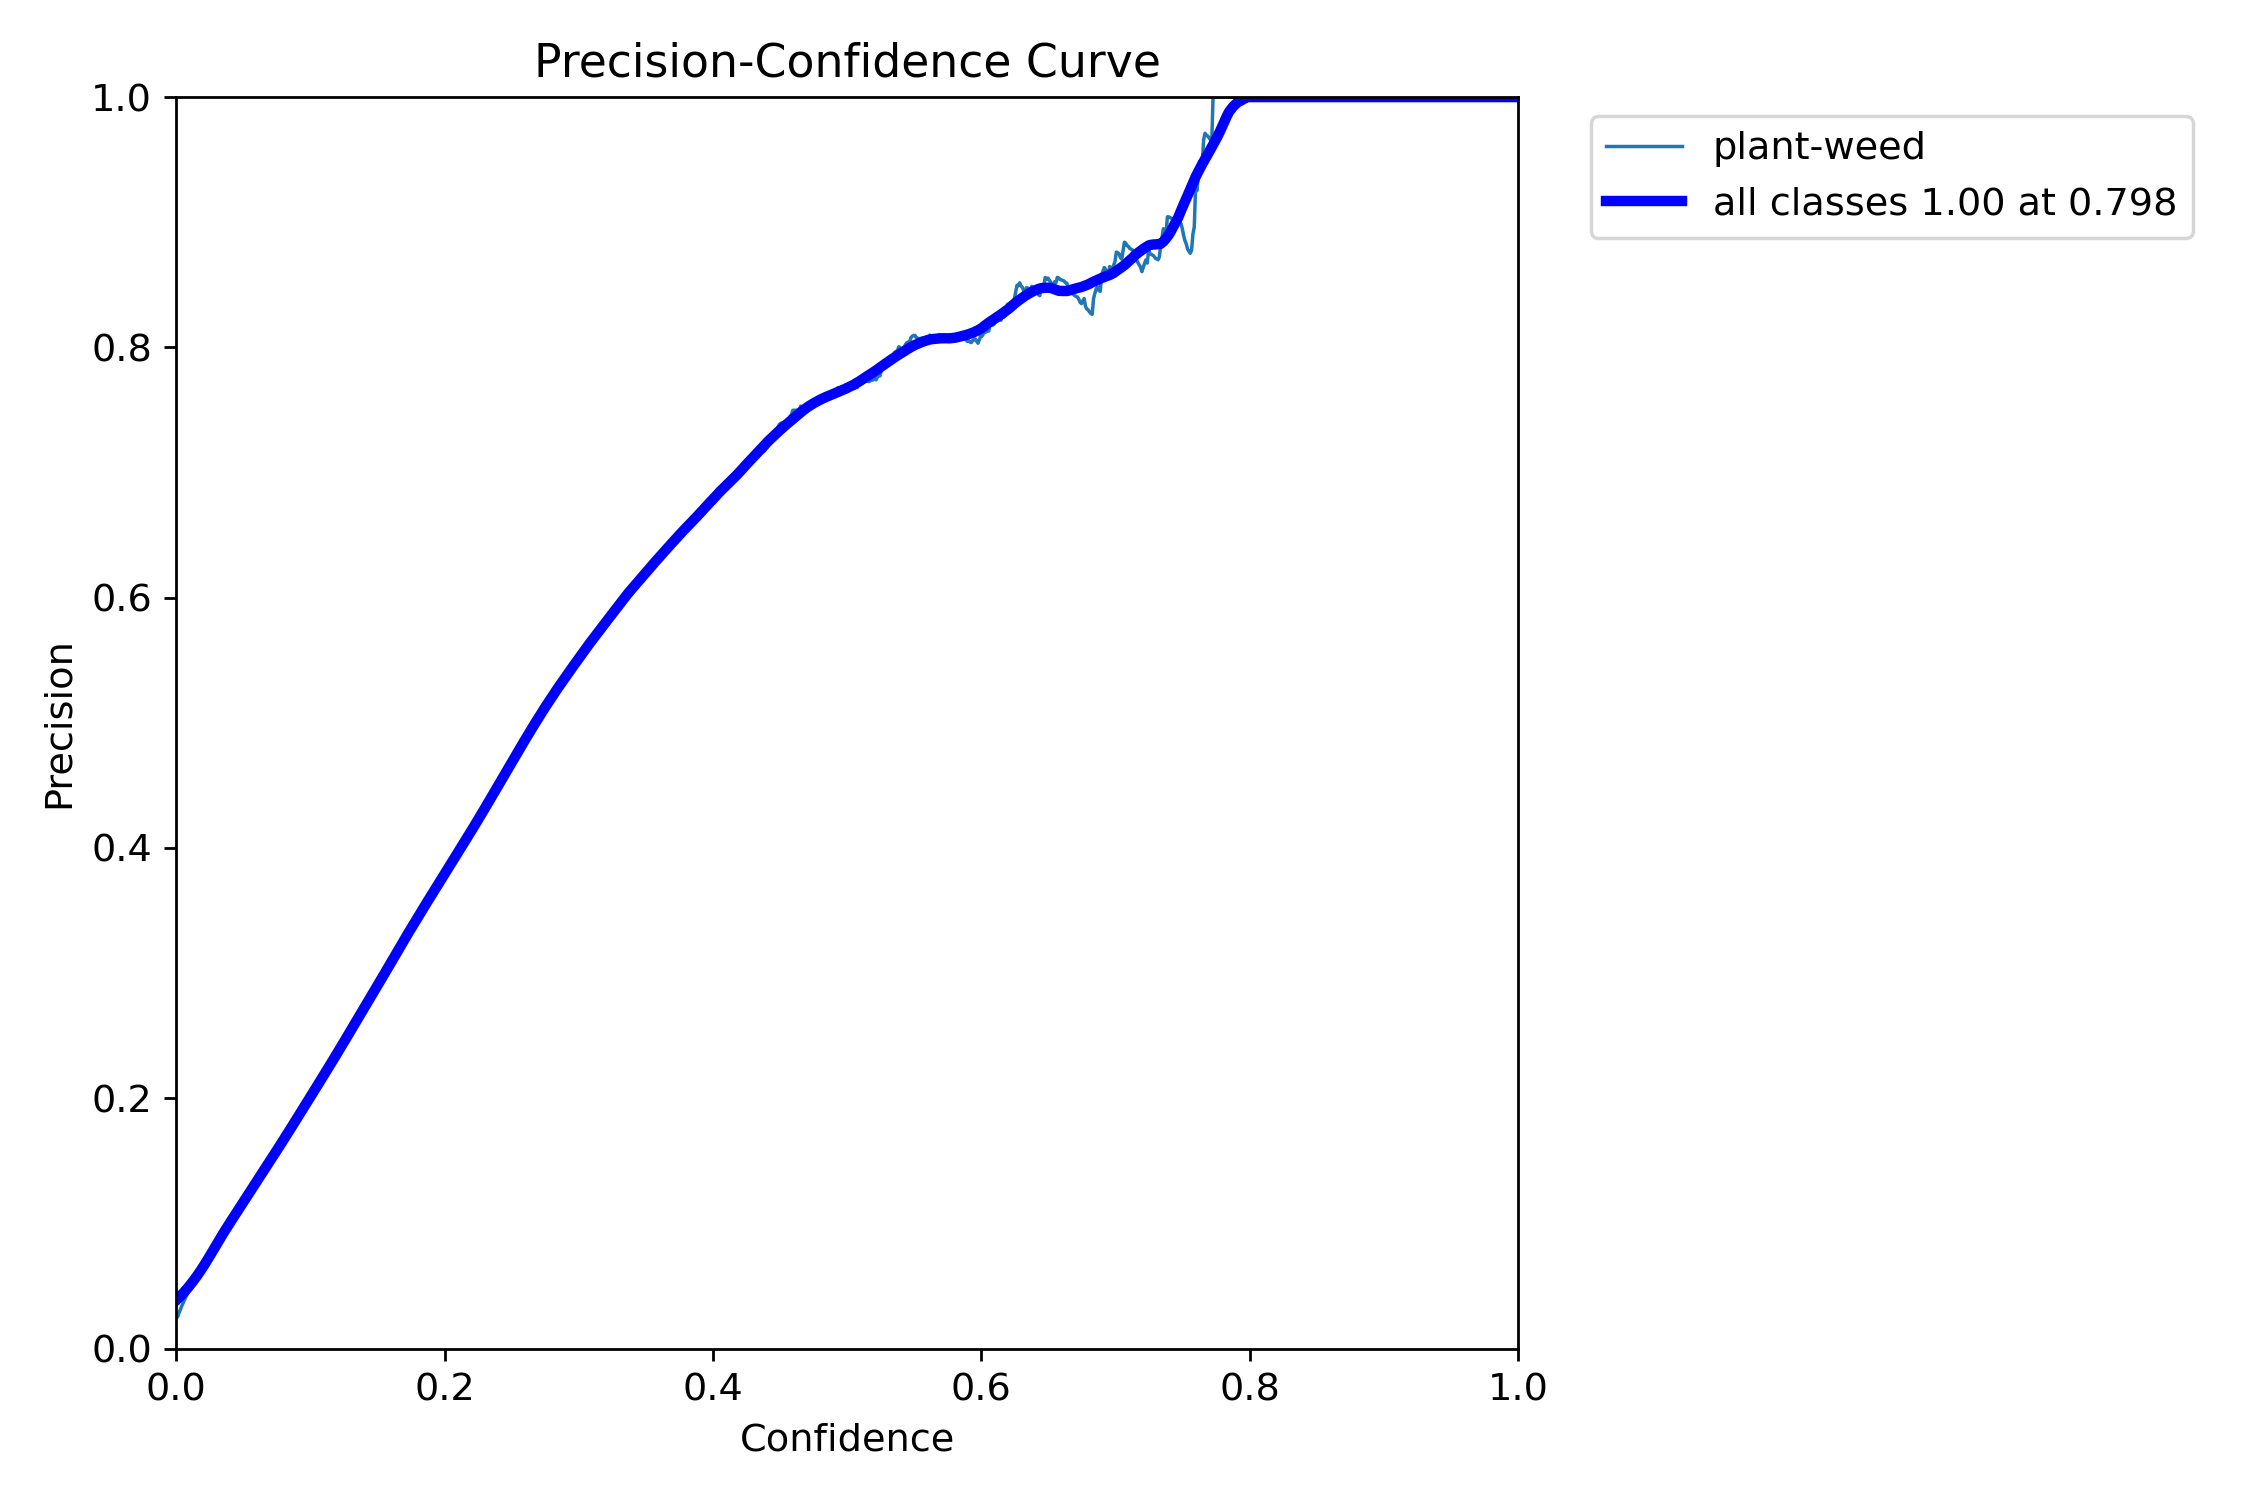

In [38]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

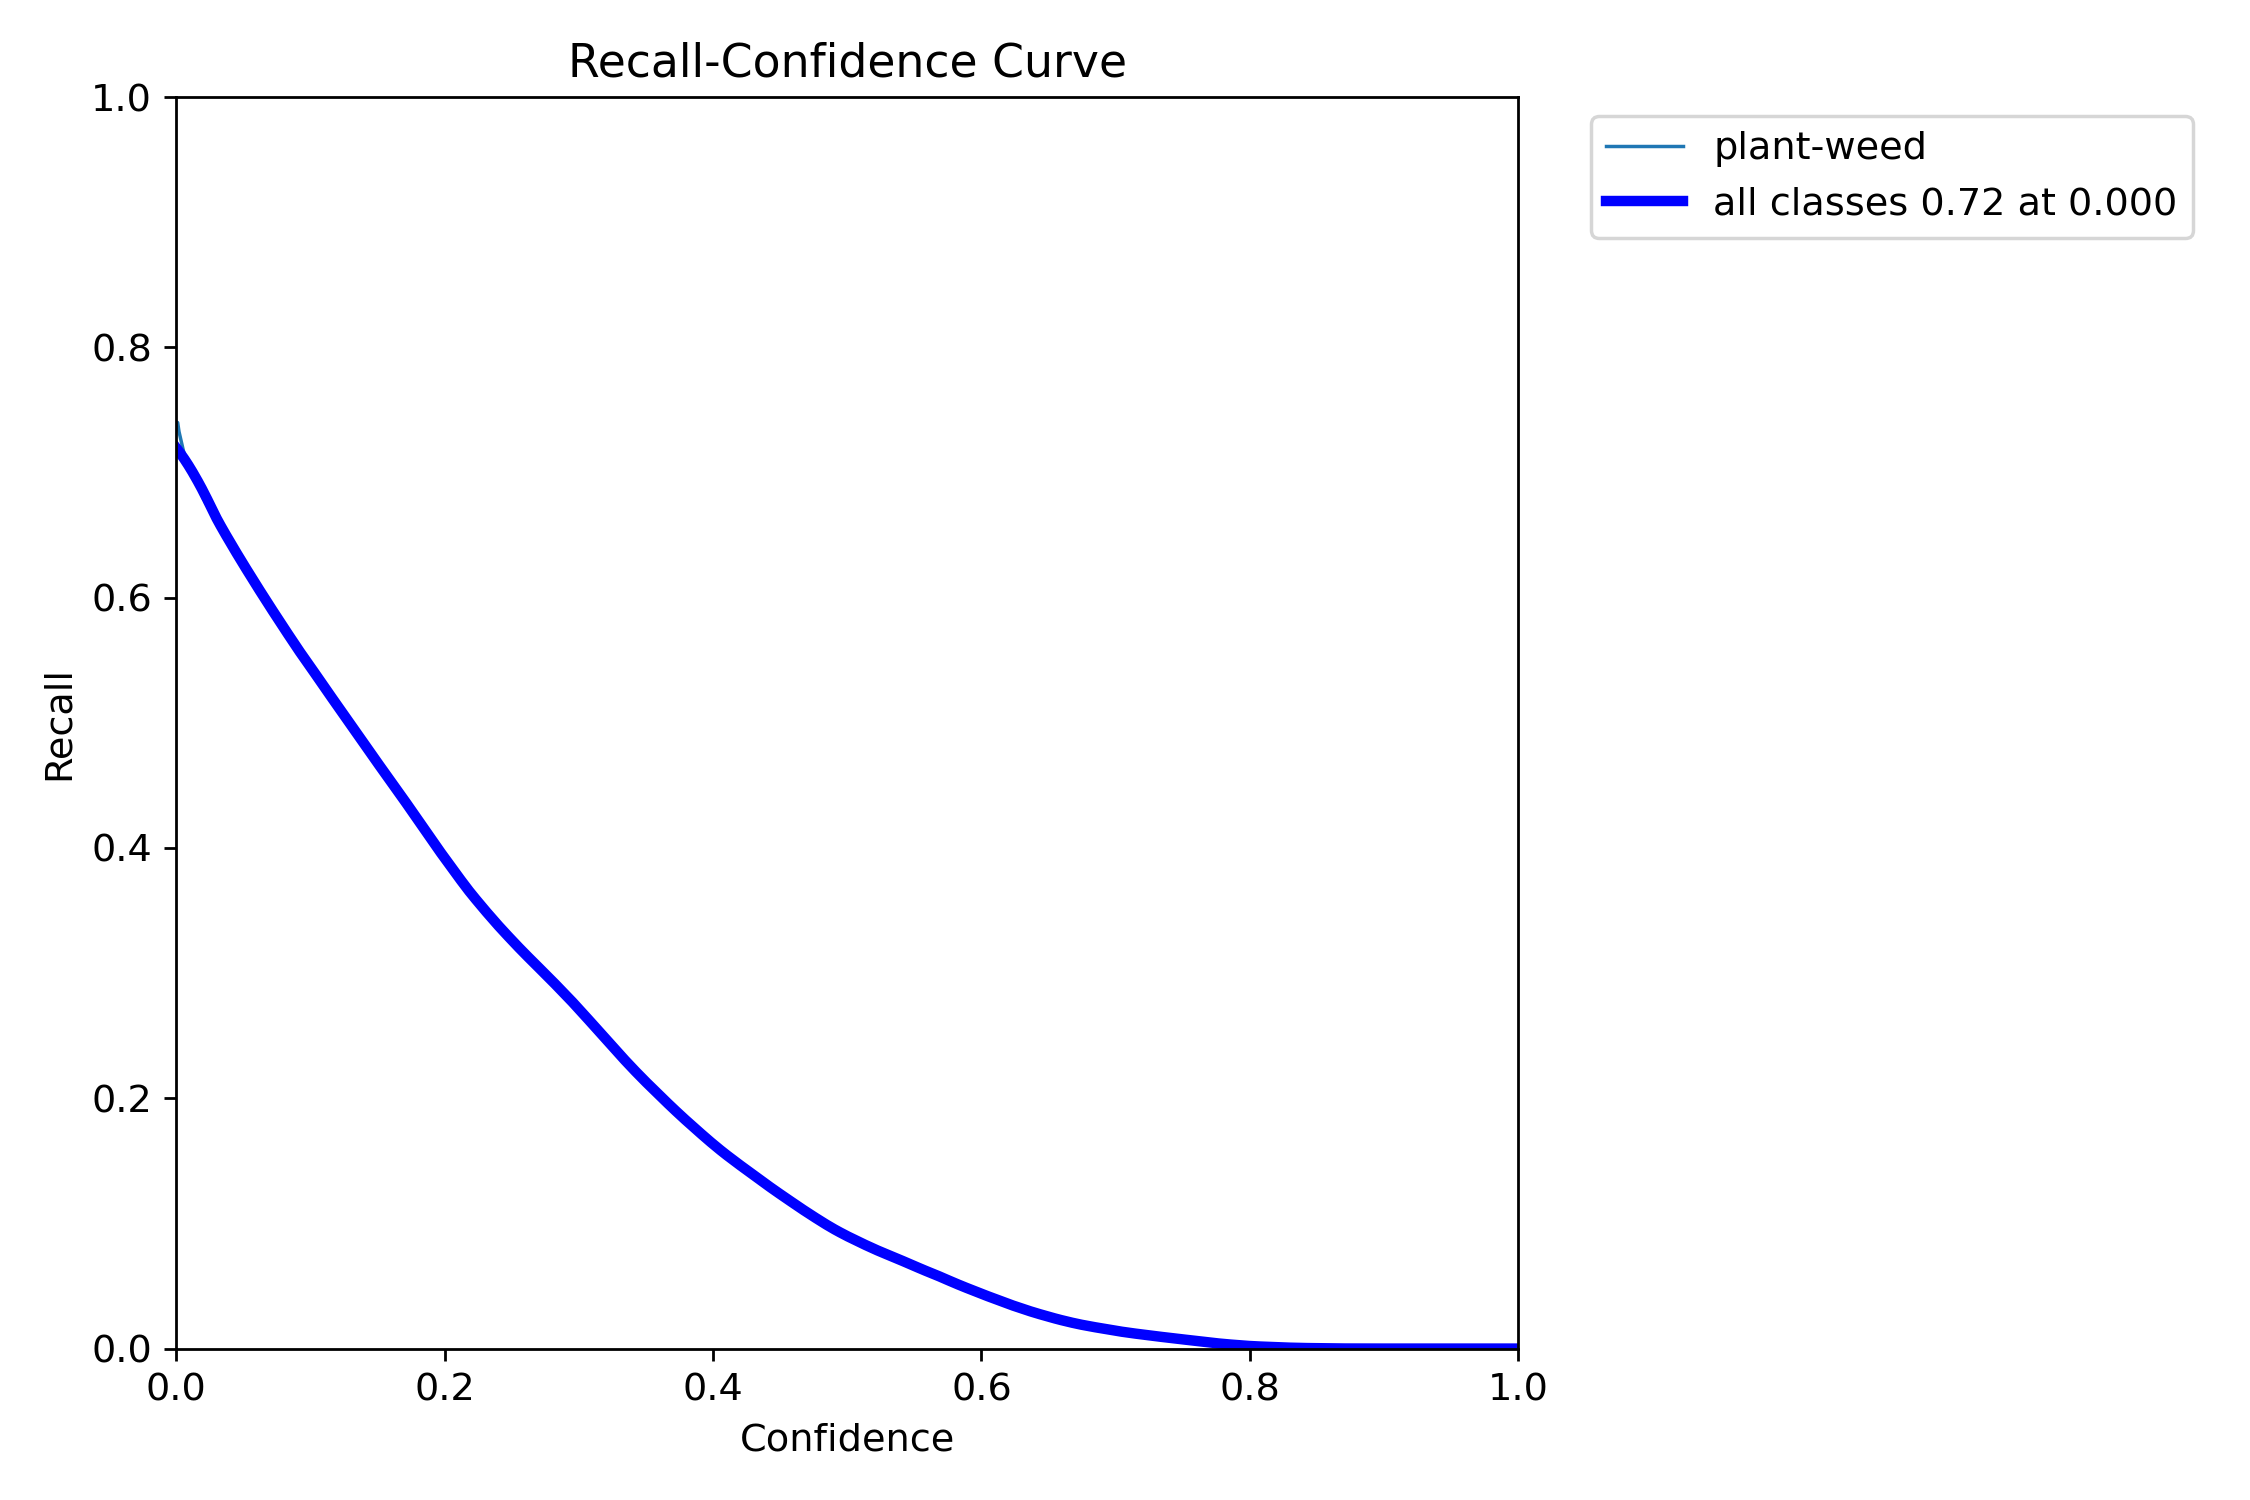

In [39]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

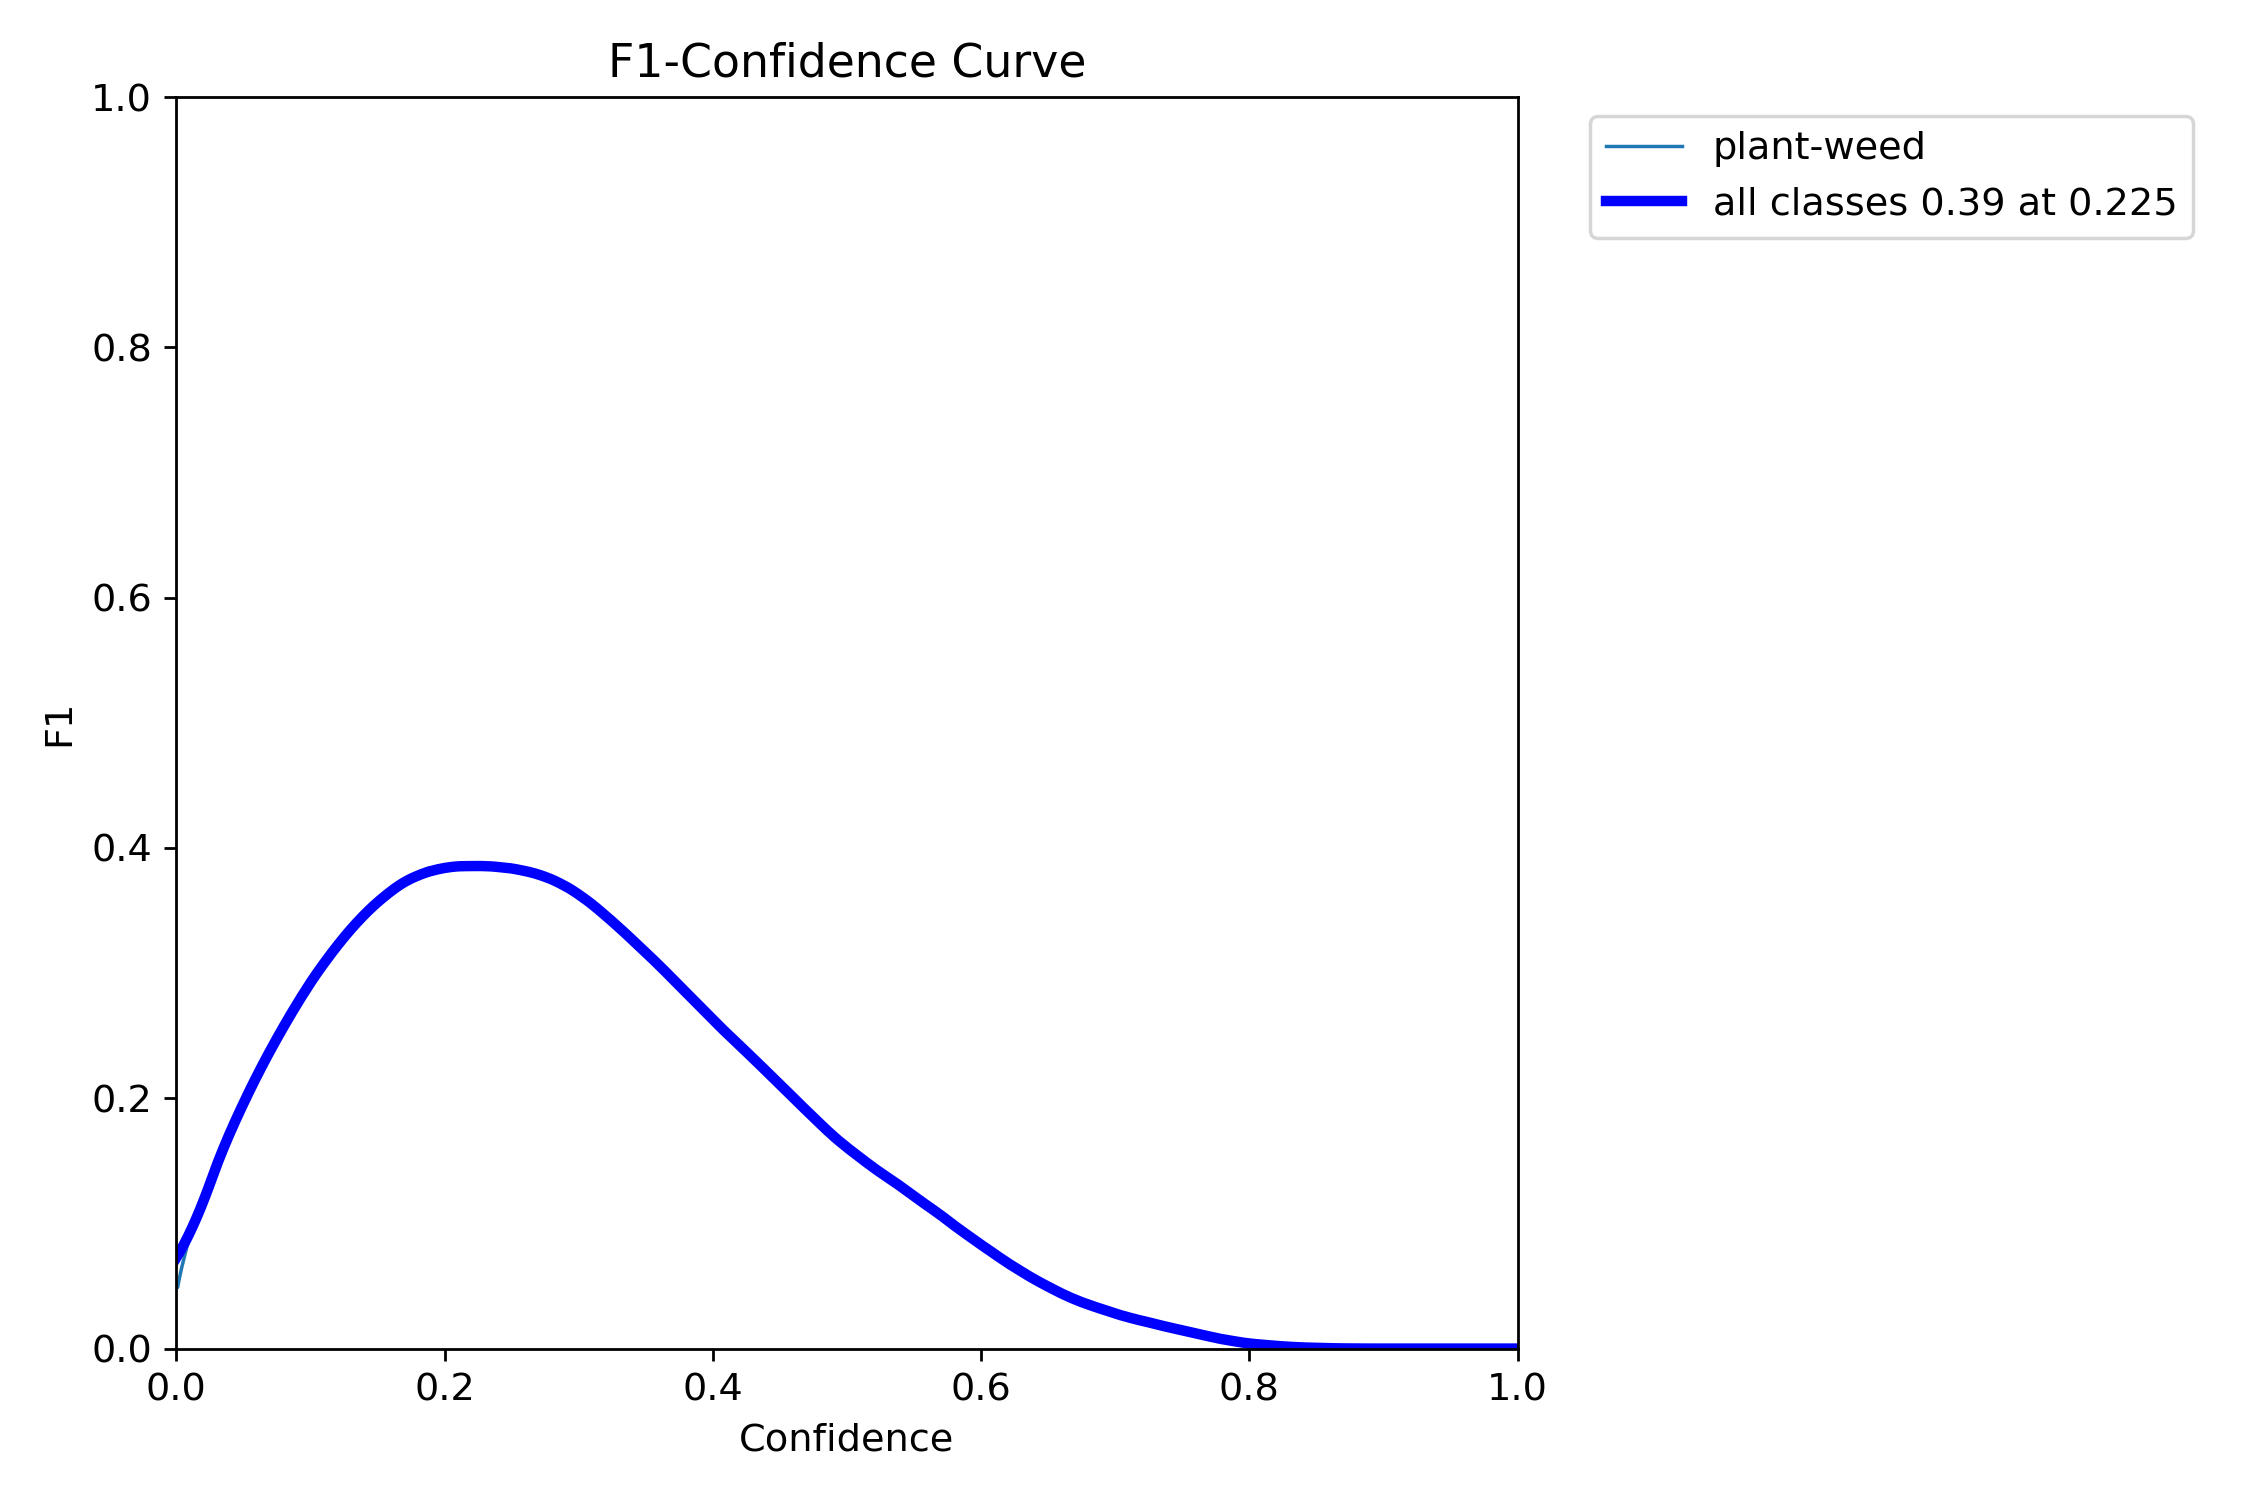

In [40]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

    - Se observa una disminución constante en las pérdidas de entrenamiento, lo que indica que el modelo está aprendiendo a ajustar sus parámetros para minimizar el error en los datos de entrenamiento.
    - Las pérdidas de validación no muestran una mejora significativa después de cierto punto, lo que sugiere que el modelo podría estar sobreajustándose alrededor de la epoch 40. Esto concuerda con la observación anterior de estancamiento y ligero aumento en las pérdidas de validación después de la época 40.

2. **Métricas de validación (Precisión, Recall, mAP)**

    - Precision y Recall muestran cierta mejora en las primeras épocas, pero luego se estabilizan o incluso fluctúan.
    - mAP@50 y mAP@50-95 no muestran mejoras significativas después de cierto punto, lo que refuerza la hipótesis de sobreajuste. Esto se alinea con el valor de mAP@0.5 de 0.319, que indica un rendimiento moderado y dificultades para equilibrar precisión y recall.
    - La matriz de confusión revela un alto número de falsos negativos (47.69%), lo que indica que el modelo tiene dificultades para detectar objetos. La cantidad considerable de falsos positivos (24.87%) también sugiere detecciones erróneas frecuentes.

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

    - El lr/pg0 sigue una reducción progresiva, lo que es típico en algunos esquemas de ajuste de tasa de aprendizaje. Esto concuerda con la disminución gradual observada en los valores de lr/pg0, lr/pg1 y lr/pg2 a lo largo de las épocas.
    - Puede ser útil ajustar la estrategia de learning rate para evitar que el modelo deje de generalizar demasiado temprano. Se podría experimentar con diferentes programas de aprendizaje para mejorar la convergencia del modelo.

#### Observaciones
- El modelo muestra signos de sobreajuste, especialmente después de la época 40.
- El rendimiento general del modelo es moderado, con dificultades para detectar objetos y un equilibrio deficiente entre precisión y recall.
- La gran cantidad de falsos negativos es un punto crítico que requiere atención.

# Métricas generales

In [41]:
best_models.index = ['Exp 1','Exp 13']

In [42]:
best_models.sort_values(by='metrics/mAP50(B)', ascending=True)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,train_time
Exp 13,86,603.118,1.97979,1.40062,1.37308,0.41873,0.35573,0.31889,0.10399,2.54386,1.74818,1.61663,0.000317,0.000317,0.000317,11.662217
Exp 1,98,1056.080,1.99376,1.39220,1.35984,0.45934,0.42311,0.39477,0.13206,2.34289,1.54928,1.52669,0.000079,0.000079,0.000079,17.927667


## Graphs

In [43]:
# Define function to plot metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(15, 5))
    plt.plot(df1["epoch"], df1[metric], label="Training 1", linestyle="--", marker="o", markersize=4)
    plt.plot(df2["epoch"], df2[metric], label="Training 2", linestyle="--", marker="s", markersize=4)
    #plt.plot(df3["epoch"], df3[metric], label="Training 3", linestyle="--", marker="d", markersize=4)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Training and Validation Losses

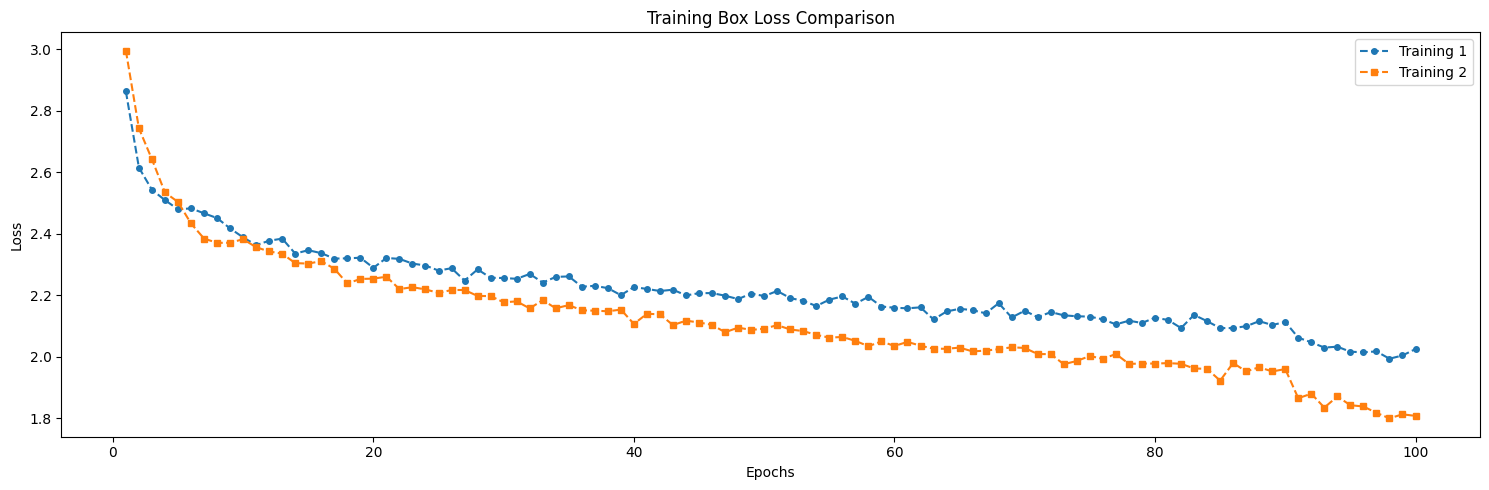

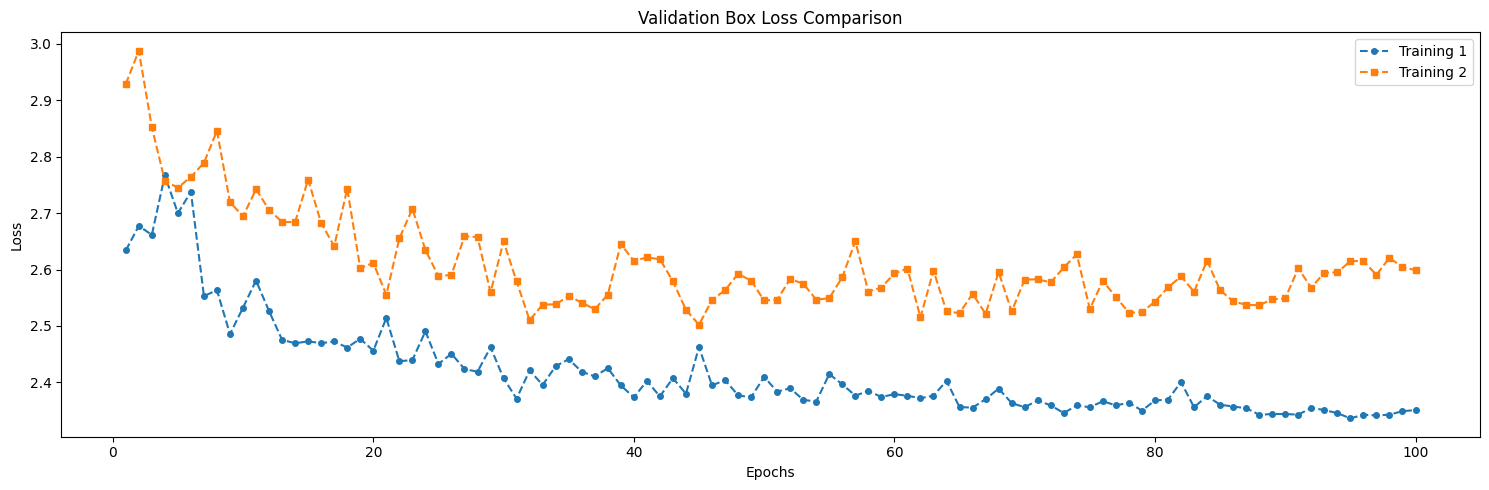

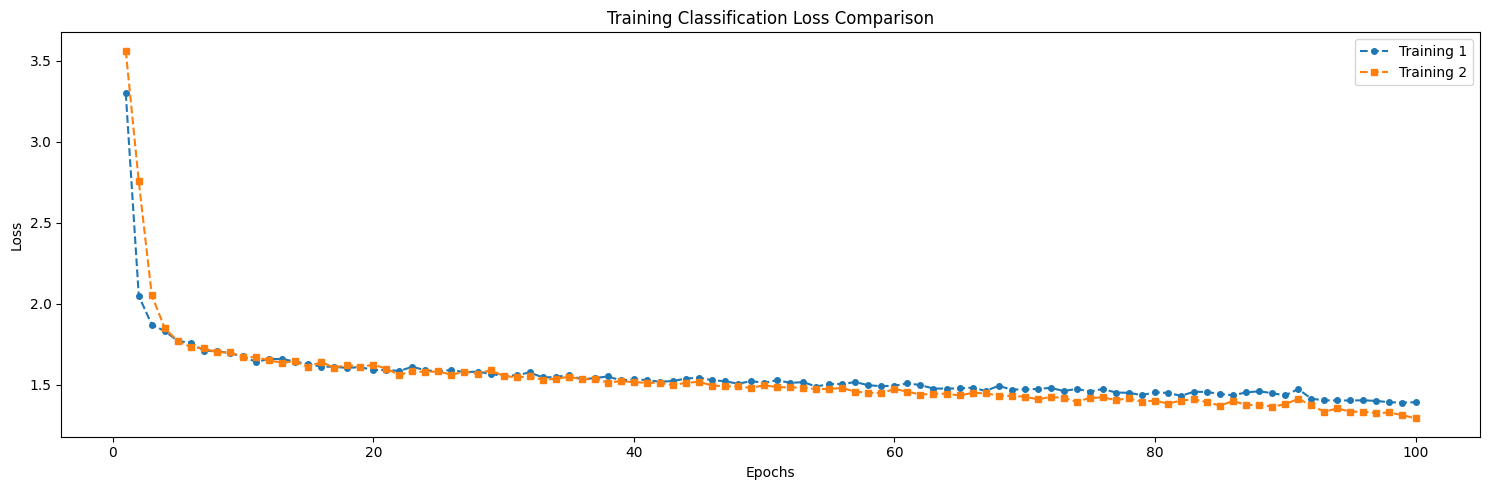

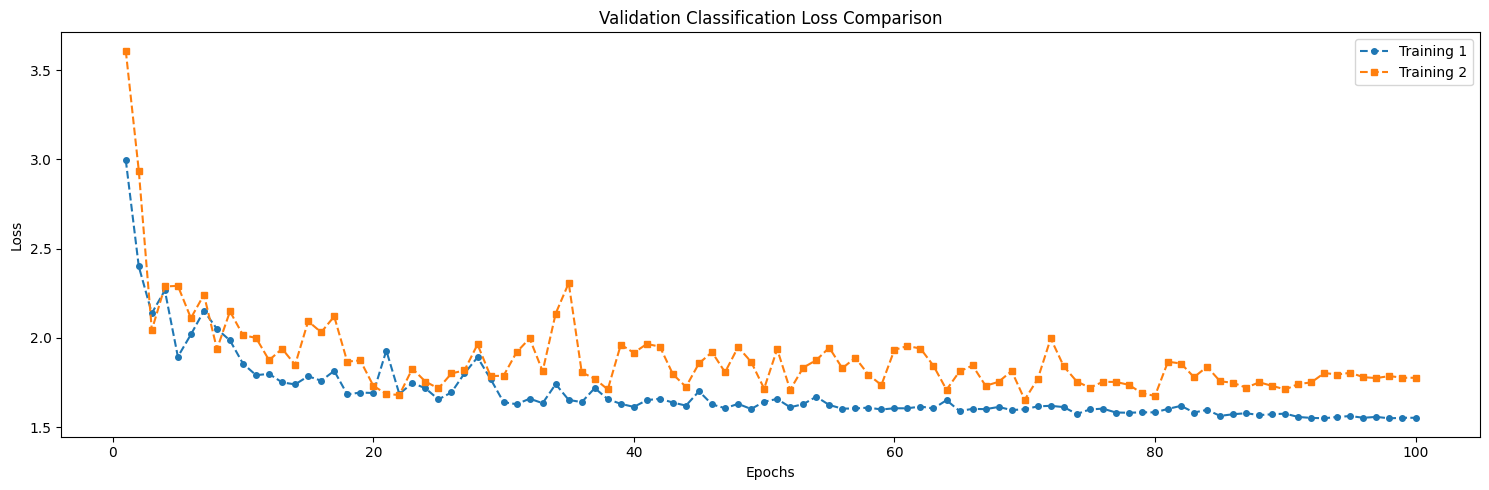

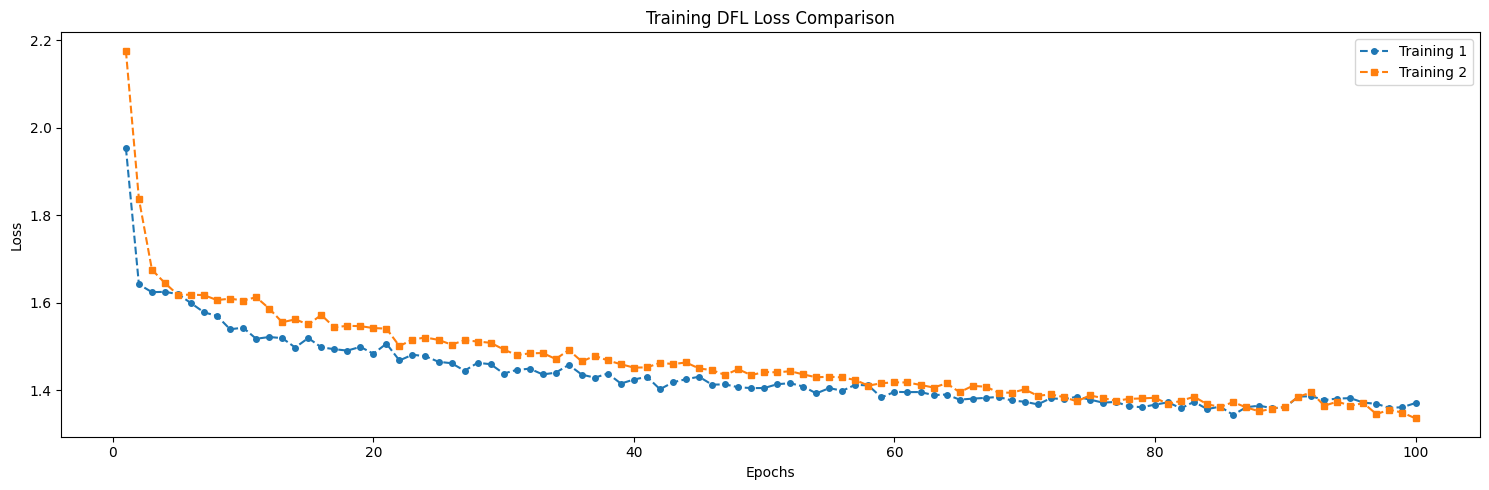

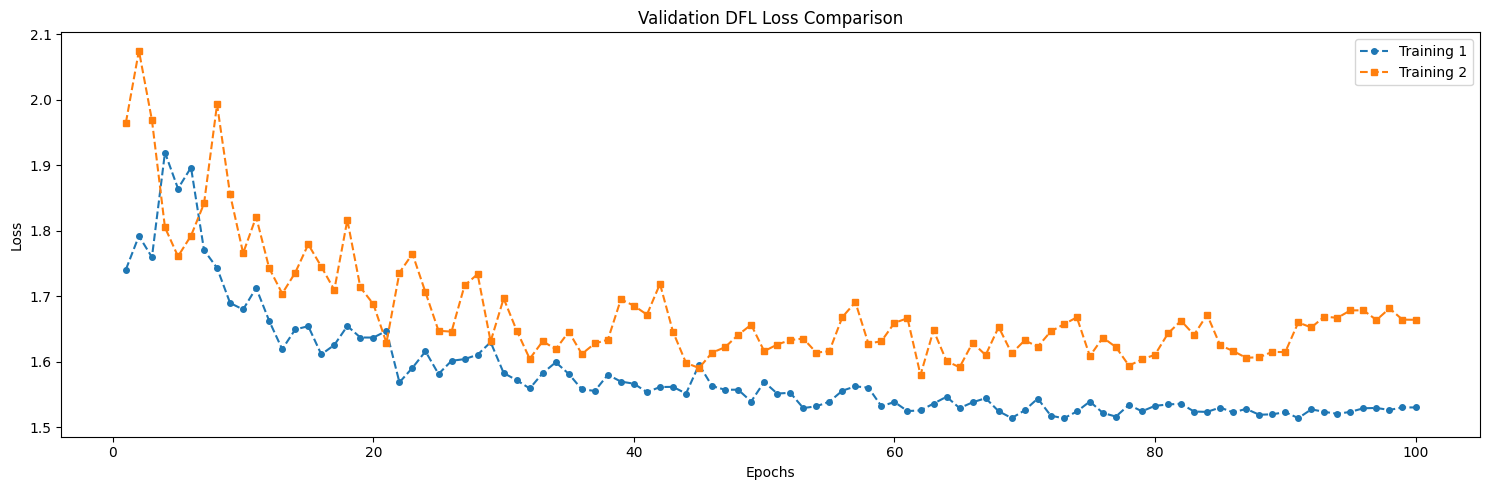

In [44]:
# Plot Training and Validation Losses
plot_metric("train/box_loss", "Loss", "Training Box Loss Comparison")
plot_metric("val/box_loss", "Loss", "Validation Box Loss Comparison")

plot_metric("train/cls_loss", "Loss", "Training Classification Loss Comparison")
plot_metric("val/cls_loss", "Loss", "Validation Classification Loss Comparison")

plot_metric("train/dfl_loss", "Loss", "Training DFL Loss Comparison")
plot_metric("val/dfl_loss", "Loss", "Validation DFL Loss Comparison")

### Performance Metrics

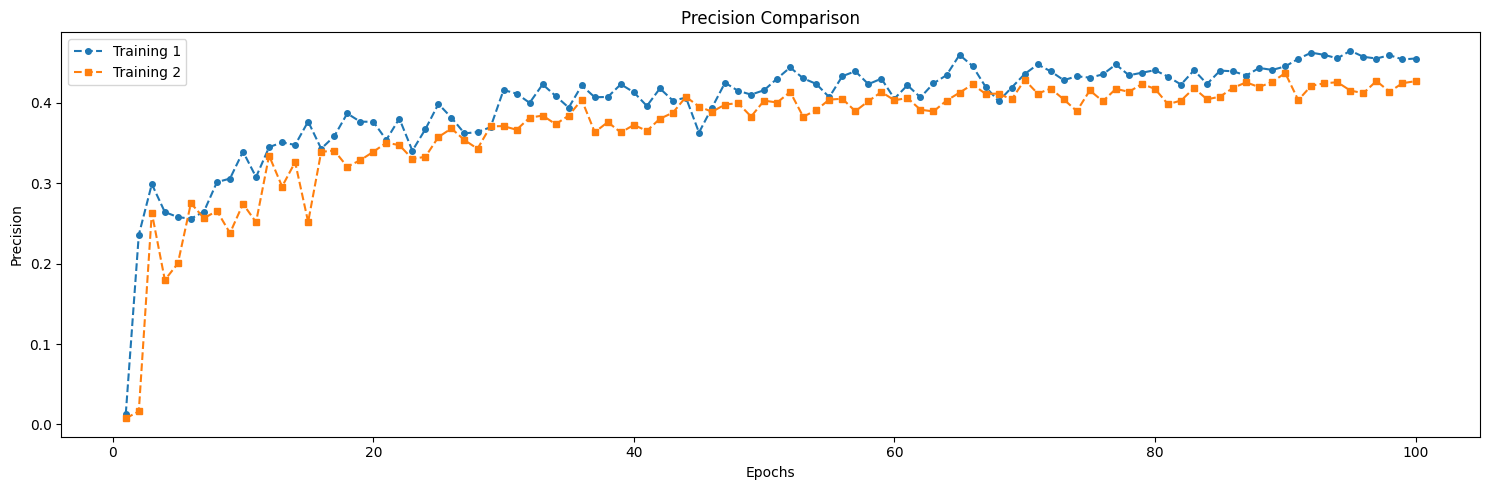

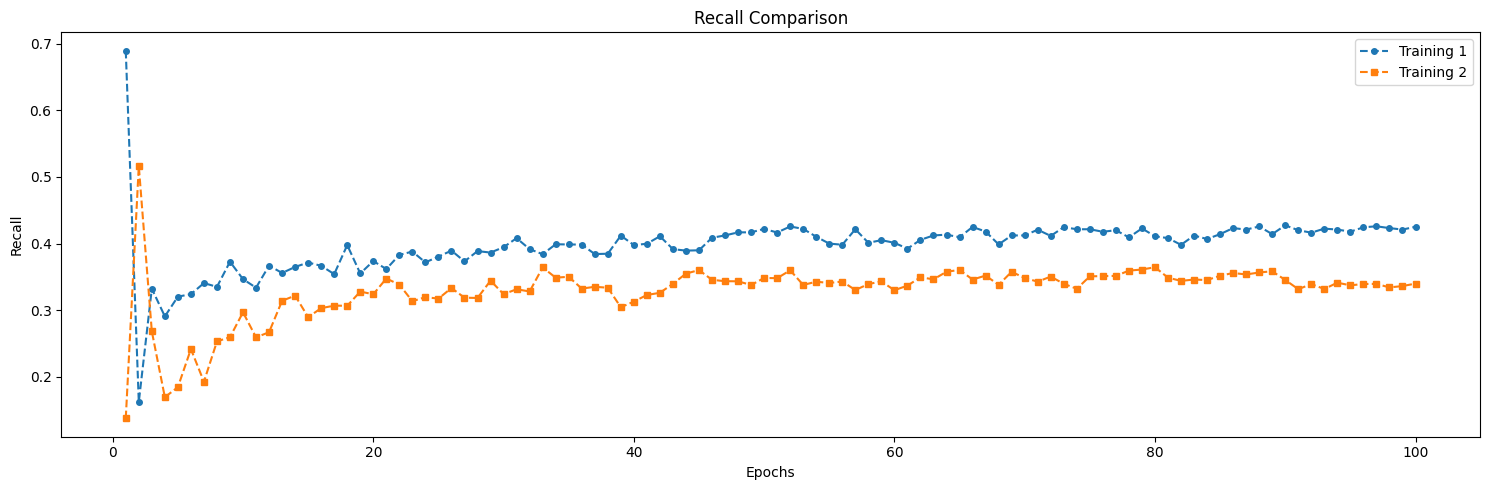

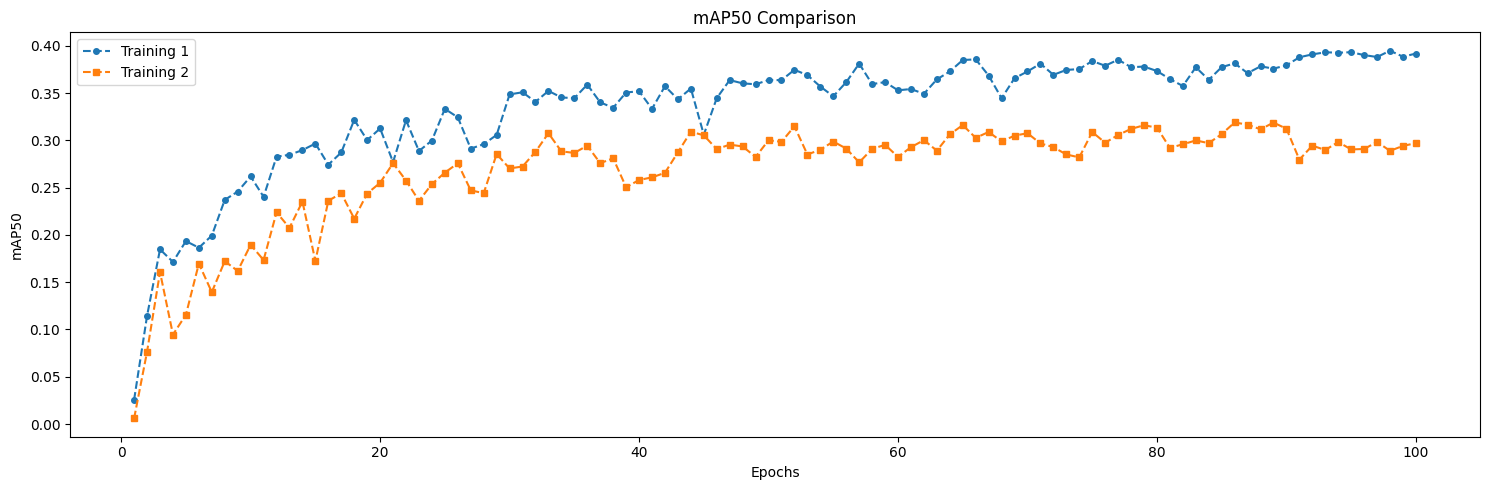

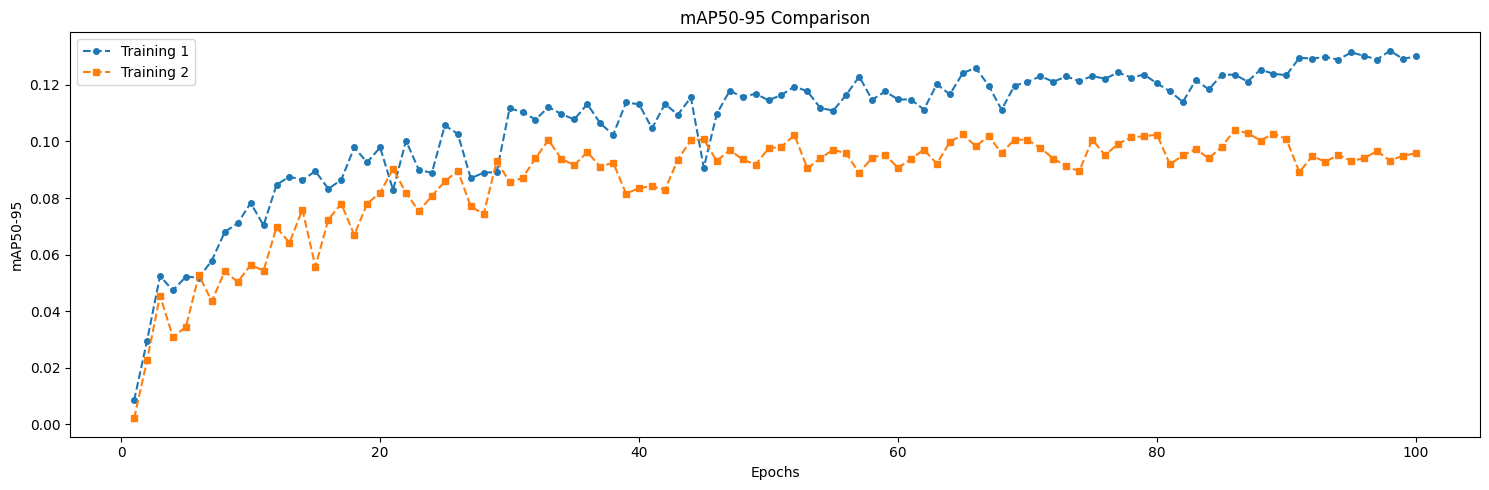

In [45]:
# Plot Performance Metrics
plot_metric("metrics/precision(B)", "Precision", "Precision Comparison")
plot_metric("metrics/recall(B)", "Recall", "Recall Comparison")
plot_metric("metrics/mAP50(B)", "mAP50", "mAP50 Comparison")
plot_metric("metrics/mAP50-95(B)", "mAP50-95", "mAP50-95 Comparison")

### Learning Rate

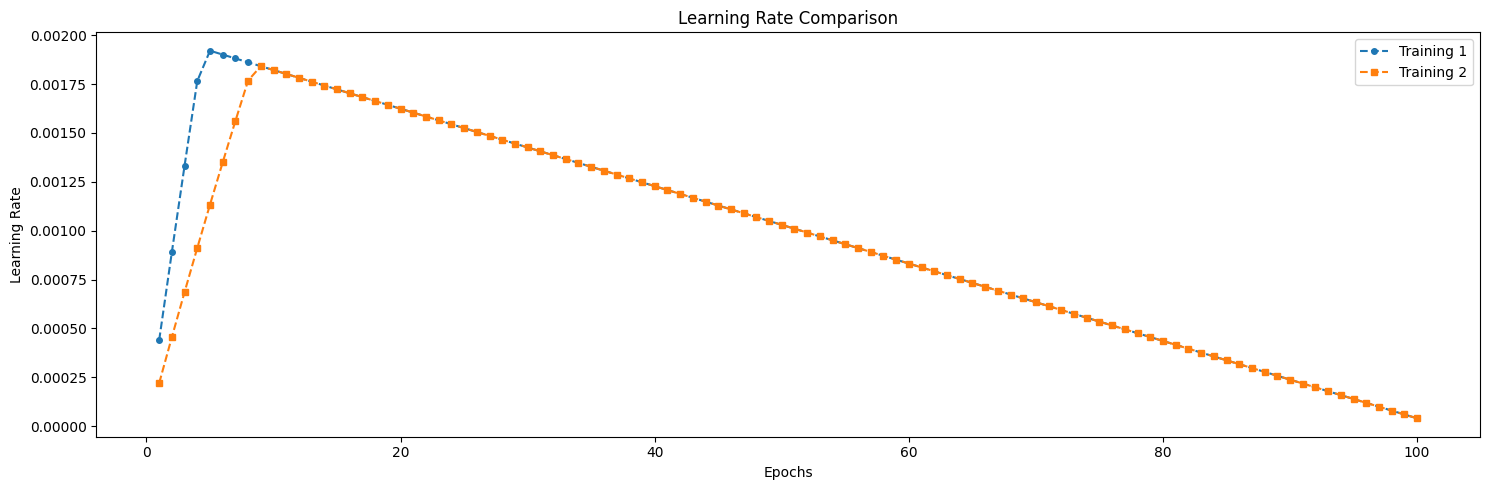

In [46]:
# Plot Learning Rate
plot_metric("lr/pg0", "Learning Rate", "Learning Rate Comparison")

## Resumen de los Experimentos

| Experiment | Dataset (Size) | Images | Tiles | Tags | Train/Valid (%) | Train Time (min) | Inf Time (ms) | Total detections | True Positives | False Positives | False Negatives | mAP@0.5 |
|------------|------|------|--------------|---------|------|------|----------------|---------------|---------------|---------------|---------------|--------|
| **Exp 1** | Small & Mid | 6 | 2204 | 7669 | 66.6% / 33.3% | *17,93* | ***1,25*** | 5472 | 31.6% | 25.4% | **43%** | ***0.395*** |
| **Exp 13** | Small & Mid | 6+4 | 3676 | 16,6k | 60% / 40% | *1,66* | ***1,84*** | 8557 | 27,44% | 24,87% | **47,69%** | ***0.319*** |

**Best result:**
- **1º TRAIN:** _Exp 13 **(3.5m | 90º+60º)**_ , Small & Mid -> 8557 det, TP 27,44% & mAP 0.319

#### Criterio de análisis

Para nuestro problema se prefiere:
1. Aquel modelo que genere un mayor número de detecciones _(idealmente TP)_.
2. Que el modelo tienda a generar más FP _(sesgado al alza)_ que FN _(no detecta plantas)_.
3. Se utiliza el mAP@0.5 ya que no se prioriza la posición del BB, pero si la cuenta de objetos.

## Resumen de los Experimentos

## Analisis comparativo

### Análisis del Dataset
1. **Cantidad de imágenes y etiquetas**:  
  -  

2. **Distribución de Train/Valid**:  
  -  

3. **Tamaño de imágenes (small vs mid)**:  
  -  

### Análisis de los Hiperparámetros
- **Modelo (yolov8n)**: Se mantuvo constante en todos los entrenamientos, lo que permite una comparación justa.  
- **Epochs (100)**: En los tres experimentos, el modelo parece alcanzar su rendimiento máximo antes de completar todas las épocas, lo que podría indicar que no se necesita entrenar tantas iteraciones.  
- **Batch Size (64)**: Se mantiene igual en todos los experimentos.  
- **Freeze (10)**: Congelar los primeros 10 capas del modelo en los tres entrenamientos podría estar limitando la capacidad de ajuste en las primeras etapas.  

### Análisis de Resultados
#### Métricas Generales
1. **Precisión (Precision) y Recall**:  
  -  

2. **mAP50**:  
  - 
  
3. **Confusión entre clases (False Positives y False Negatives)**:  
  - 
  
### Conclusiones Generales
1. 

# Conclusión Final


## Estrategias para Próximos Entrenamientos
1. **Dataset**
- 

2. **Hiperparámetros**
-  

3. **Optimización del Modelo**
- 

4. **Evaluación y Métricas**
-  